# <center>Telecom Churn Case Study</center>
## Insightful Loan Default - Exploratory Data Analysis
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.<br><br>
In the Indian and the southeast Asian market, approximately __80% of revenue comes from the top 20% customers (called high-value customers)__. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.<br>
In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.

## Business Objective
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.<br>
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.<br><br>
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.<br><br>
The __business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months__. To do this task well, understanding the typical customer behaviour during churn will be helpful.

### Analysis by:
* Pradeep Kumar S [Group Facilitator]
* Manoj Romina

## Importing Libraries and Dataset

In [1]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd
import time

In [2]:
# importing visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
# importing model building libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC

import statsmodels.api as sm
from sklearn.feature_selection import RFE
import xgboost as xgb

In [4]:
# install imblearn
!pip install imblearn

In [5]:
# importing imblearn
from imblearn.over_sampling import SMOTE

#### Setting Configurations

In [6]:
# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
## Setting the sns style
sns.set(style="darkgrid")

## Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None

## To suppress Scientific Notation
pd.options.display.float_format = "{:.2f}".format

## Setting display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


#### Loading Dataset


In [8]:
# loading the dataset
telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.shape

(99999, 226)

## Data Understanding and Exploration

In [9]:
# checking the contents of dataframe
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [10]:
# information related to telecom dataframe
telecom_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [11]:
# Summary/descriptive statistics
telecom_data.describe(include="all")

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999,99398,98899,98340,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

### Data Preparation¶

#### Check for Duplicate Records

In [12]:
# checking if mobile numbers are unique
telecom_data['mobile_number'].nunique()

99999

In [13]:
# dropping duplicates if any exits
telecom_data.drop_duplicates(inplace=True)
telecom_data.shape

(99999, 226)

We can notice that there were __NO Duplicate__ records found.

#### Treating Missing Values¶

Defining a utility method to check missing values based on a cutoff.

In [14]:
# Function to return columns with missing values
def get_columns_with_missing_values(df, cut_off=0):
    """Function to return columns with missing values"""
    missing_cols = round(100 * (df.isnull().sum()/df.shape[0]).sort_values(ascending=False), 2)
    print(f"There are {len(missing_cols.loc[missing_cols > cut_off])} features having more than {cut_off}% missing values")
    return missing_cols.loc[missing_cols > cut_off]

Defining a utility method to impute missing values based on fill_value.


In [15]:
# Function to impute null values with a fill value
def impute_null_values(df, fill_value=0, impute_col_list=False, missing_col_list=False):
    """Function to impute null values with a fill value"""
    if impute_col_list:
        for col in [i_col + month for month in ['_6','_7','_8','_9'] for i_col in impute_col_list]:
            df[col].fillna(fill_value, inplace=True)
    else:
        for col in missing_col_list:
            df[col].fillna(fill_value, inplace=True)

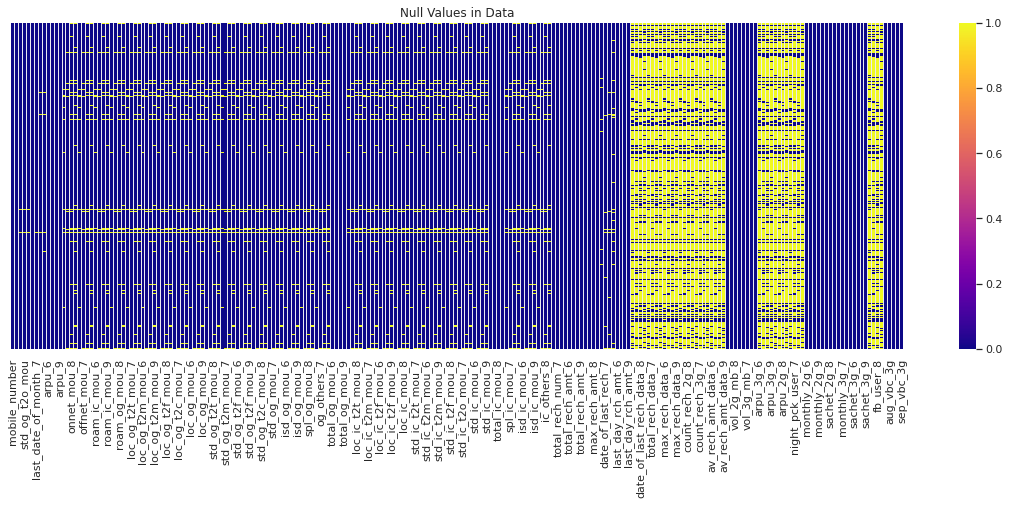

In [16]:
# plotting a heatmap to represent missing values
plt.figure(figsize=(20, 6))
sns.heatmap(telecom_data.isnull(), yticklabels=False, cmap='plasma')
plt.title('Null Values in Data')
plt.show()

In [17]:
# Get the columns with null values greater than 0%
get_columns_with_missing_values(telecom_data)

There are 166 features having more than 0% missing values


count_rech_2g_6            74.85
date_of_last_rech_data_6   74.85
count_rech_3g_6            74.85
av_rech_amt_data_6         74.85
max_rech_data_6            74.85
total_rech_data_6          74.85
arpu_3g_6                  74.85
arpu_2g_6                  74.85
night_pck_user_6           74.85
fb_user_6                  74.85
arpu_3g_7                  74.43
count_rech_2g_7            74.43
fb_user_7                  74.43
count_rech_3g_7            74.43
arpu_2g_7                  74.43
av_rech_amt_data_7         74.43
max_rech_data_7            74.43
night_pck_user_7           74.43
total_rech_data_7          74.43
date_of_last_rech_data_7   74.43
night_pck_user_9           74.08
date_of_last_rech_data_9   74.08
fb_user_9                  74.08
arpu_2g_9                  74.08
max_rech_data_9            74.08
arpu_3g_9                  74.08
total_rech_data_9          74.08
av_rech_amt_data_9         74.08
count_rech_3g_9            74.08
count_rech_2g_9            74.08
fb_user_8 

In [18]:
# Get the columns with null values greater than 50%
get_columns_with_missing_values(telecom_data, cut_off=50)

There are 40 features having more than 50% missing values


count_rech_2g_6            74.85
date_of_last_rech_data_6   74.85
count_rech_3g_6            74.85
av_rech_amt_data_6         74.85
max_rech_data_6            74.85
total_rech_data_6          74.85
arpu_3g_6                  74.85
arpu_2g_6                  74.85
night_pck_user_6           74.85
fb_user_6                  74.85
arpu_3g_7                  74.43
count_rech_2g_7            74.43
fb_user_7                  74.43
count_rech_3g_7            74.43
arpu_2g_7                  74.43
av_rech_amt_data_7         74.43
max_rech_data_7            74.43
night_pck_user_7           74.43
total_rech_data_7          74.43
date_of_last_rech_data_7   74.43
night_pck_user_9           74.08
date_of_last_rech_data_9   74.08
fb_user_9                  74.08
arpu_2g_9                  74.08
max_rech_data_9            74.08
arpu_3g_9                  74.08
total_rech_data_9          74.08
av_rech_amt_data_9         74.08
count_rech_3g_9            74.08
count_rech_2g_9            74.08
fb_user_8 

We can observe that most of the columns here are essential_ for churn analysis and hence we won't be dropping them.
We will impute all the above columns with 0 except the date columns.

In [19]:
# imputing colums with 0 as fill values
impute_cols = ['max_rech_data', 'total_rech_data','fb_user','night_pck_user', 'av_rech_amt_data', 
               'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g']
impute_null_values(telecom_data, impute_col_list=impute_cols)

In [20]:
# Get the columns with null values greater than 50%
get_columns_with_missing_values(telecom_data, cut_off=50)

There are 4 features having more than 50% missing values


date_of_last_rech_data_6   74.85
date_of_last_rech_data_7   74.43
date_of_last_rech_data_9   74.08
date_of_last_rech_data_8   73.66
dtype: float64

Dropping the date columns as imputing them wont make sense.

In [21]:
# dropping date columns with null values greater than 50%
telecom_data.drop(
    ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_9', 'date_of_last_rech_data_8'], 
    axis=1, inplace=True
)

In [22]:
telecom_data.shape

(99999, 222)

Checking columns with missing values greater than 6%

In [23]:
# get columns with missing values
get_columns_with_missing_values(telecom_data, cut_off=6)

There are 29 features having more than 6% missing values


std_ic_t2o_mou_9   7.75
std_og_t2m_mou_9   7.75
offnet_mou_9       7.75
std_og_t2c_mou_9   7.75
roam_ic_mou_9      7.75
std_ic_t2f_mou_9   7.75
std_og_t2f_mou_9   7.75
roam_og_mou_9      7.75
loc_og_t2t_mou_9   7.75
loc_ic_mou_9       7.75
std_ic_t2t_mou_9   7.75
std_og_t2t_mou_9   7.75
loc_og_t2m_mou_9   7.75
std_ic_t2m_mou_9   7.75
loc_og_mou_9       7.75
loc_og_t2f_mou_9   7.75
std_og_mou_9       7.75
loc_og_t2c_mou_9   7.75
isd_og_mou_9       7.75
spl_ic_mou_9       7.75
loc_ic_t2t_mou_9   7.75
spl_og_mou_9       7.75
og_others_9        7.75
loc_ic_t2f_mou_9   7.75
ic_others_9        7.75
isd_ic_mou_9       7.75
onnet_mou_9        7.75
loc_ic_t2m_mou_9   7.75
std_ic_mou_9       7.75
dtype: float64

We have 29 columns with greater than 6% missing values. Calcutaling the number of rows impacted due to this.

In [24]:
missing_val_cols = get_columns_with_missing_values(telecom_data, cut_off=6).index
null_val_df = telecom_data[telecom_data[missing_val_cols].isnull().all(axis=1)][missing_val_cols]
print(f"There are {null_val_df.shape[0]} customers with missing values greater than 6%")
null_val_df.head()

There are 29 features having more than 6% missing values
There are 7745 customers with missing values greater than 6%


,std_ic_t2o_mou_9,std_og_t2m_mou_9,offnet_mou_9,std_og_t2c_mou_9,roam_ic_mou_9,std_ic_t2f_mou_9,std_og_t2f_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_og_t2t_mou_9,loc_og_t2m_mou_9,std_ic_t2m_mou_9,loc_og_mou_9,loc_og_t2f_mou_9,std_og_mou_9,loc_og_t2c_mou_9,isd_og_mou_9,spl_ic_mou_9,loc_ic_t2t_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2f_mou_9,ic_others_9,isd_ic_mou_9,onnet_mou_9,loc_ic_t2m_mou_9,std_ic_mou_9
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
32,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
35,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


We can observe that we have 7745 rows with null values and hence we can impute then with zero.


In [25]:
# imputing columns with missing values less than 8%
impute_null_values(telecom_data, missing_col_list=missing_val_cols)

Checking columns with missing values greater than 2%

In [26]:
# get columns with missing values
get_columns_with_missing_values(telecom_data, cut_off=2)

There are 89 features having more than 2% missing values


loc_og_t2m_mou_8      5.38
loc_og_t2c_mou_8      5.38
isd_ic_mou_8          5.38
loc_og_mou_8          5.38
loc_ic_t2f_mou_8      5.38
roam_ic_mou_8         5.38
std_ic_t2o_mou_8      5.38
roam_og_mou_8         5.38
std_og_t2f_mou_8      5.38
std_ic_t2f_mou_8      5.38
std_ic_mou_8          5.38
loc_og_t2t_mou_8      5.38
loc_ic_t2t_mou_8      5.38
spl_ic_mou_8          5.38
spl_og_mou_8          5.38
std_og_t2c_mou_8      5.38
offnet_mou_8          5.38
loc_og_t2f_mou_8      5.38
std_og_t2m_mou_8      5.38
onnet_mou_8           5.38
std_og_mou_8          5.38
std_og_t2t_mou_8      5.38
loc_ic_t2m_mou_8      5.38
std_ic_t2m_mou_8      5.38
isd_og_mou_8          5.38
loc_ic_mou_8          5.38
og_others_8           5.38
std_ic_t2t_mou_8      5.38
ic_others_8           5.38
date_of_last_rech_9   4.76
std_og_t2f_mou_6      3.94
loc_og_t2c_mou_6      3.94
ic_others_6           3.94
std_og_t2m_mou_6      3.94
spl_ic_mou_6          3.94
isd_ic_mou_6          3.94
loc_og_mou_6          3.94
s

In [27]:
missing_val_cols = list(get_columns_with_missing_values(telecom_data, cut_off=2).index)
null_val_df = telecom_data[telecom_data[missing_val_cols].isnull().all(axis=1)][missing_val_cols]
print(f"There are {null_val_df.shape[0]} customers with missing values greater than 6%")
null_val_df.head()

There are 89 features having more than 2% missing values
There are 381 customers with missing values greater than 6%


,loc_og_t2m_mou_8,loc_og_t2c_mou_8,isd_ic_mou_8,loc_og_mou_8,loc_ic_t2f_mou_8,roam_ic_mou_8,std_ic_t2o_mou_8,roam_og_mou_8,std_og_t2f_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,loc_og_t2t_mou_8,loc_ic_t2t_mou_8,spl_ic_mou_8,spl_og_mou_8,std_og_t2c_mou_8,offnet_mou_8,loc_og_t2f_mou_8,std_og_t2m_mou_8,onnet_mou_8,std_og_mou_8,std_og_t2t_mou_8,loc_ic_t2m_mou_8,std_ic_t2m_mou_8,isd_og_mou_8,loc_ic_mou_8,og_others_8,std_ic_t2t_mou_8,ic_others_8,date_of_last_rech_9,std_og_t2f_mou_6,loc_og_t2c_mou_6,ic_others_6,std_og_t2m_mou_6,spl_ic_mou_6,isd_ic_mou_6,loc_og_mou_6,std_og_t2c_mou_6,std_og_t2t_mou_6,loc_og_t2t_mou_6,loc_og_t2f_mou_6,loc_ic_t2t_mou_6,loc_ic_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,spl_og_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,onnet_mou_6,offnet_mou_6,loc_ic_t2m_mou_6,std_ic_t2o_mou_6,roam_ic_mou_6,roam_og_mou_6,std_ic_mou_6,std_og_mou_6,loc_og_t2m_mou_6,isd_og_mou_6,og_others_6,spl_og_mou_7,std_ic_t2f_mou_7,og_others_7,ic_others_7,isd_ic_mou_7,spl_ic_mou_7,loc_ic_t2t_mou_7,std_ic_mou_7,std_ic_t2o_mou_7,loc_ic_t2m_mou_7,std_ic_t2m_mou_7,std_ic_t2t_mou_7,loc_ic_mou_7,isd_og_mou_7,std_og_t2c_mou_7,loc_og_t2m_mou_7,std_og_t2m_mou_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,loc_ic_t2f_mou_7,std_og_t2f_mou_7,std_og_mou_7,date_of_last_rech_8
202,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
275,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
687,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1206,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
1232,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN


We can observe that we have 381 rows with null values and hence we can impute them with 0.

In [28]:
# removing date columns from missing_val_cols
missing_val_cols.remove('date_of_last_rech_9')
missing_val_cols.remove('date_of_last_rech_8')

In [29]:
# imputing missing values with zeros
impute_null_values(telecom_data, missing_col_list=missing_val_cols)

Checking columns with remaining missing values

In [30]:
# get columns with missing values greater than 0%
get_columns_with_missing_values(telecom_data)

There are 10 features having more than 0% missing values


date_of_last_rech_9    4.76
date_of_last_rech_8    3.62
date_of_last_rech_7    1.77
last_date_of_month_9   1.66
date_of_last_rech_6    1.61
last_date_of_month_8   1.10
loc_og_t2o_mou         1.02
std_og_t2o_mou         1.02
loc_ic_t2o_mou         1.02
last_date_of_month_7   0.60
dtype: float64

Since these columns have missing values less than 5% we can impute them with the mode value

In [31]:
# checking the unique values for the columns with missing values less than 5%
missing_val_cols = list(get_columns_with_missing_values(telecom_data).index)
for col in missing_val_cols:
    print(f"Unique value count for {col}: {telecom_data[col].nunique()}")
    print(f"Unique value list for {col}: {telecom_data[col].unique()} \n")

There are 10 features having more than 0% missing values
Unique value count for date_of_last_rech_9: 30
Unique value list for date_of_last_rech_9: ['9/28/2014' '9/30/2014' '9/29/2014' '9/20/2014' '9/6/2014' nan
 '9/21/2014' '9/26/2014' '9/10/2014' '9/24/2014' '9/16/2014' '9/27/2014'
 '9/25/2014' '9/12/2014' '9/17/2014' '9/15/2014' '9/8/2014' '9/23/2014'
 '9/11/2014' '9/22/2014' '9/9/2014' '9/19/2014' '9/7/2014' '9/1/2014'
 '9/2/2014' '9/13/2014' '9/3/2014' '9/18/2014' '9/14/2014' '9/5/2014'
 '9/4/2014'] 

Unique value count for date_of_last_rech_8: 31
Unique value list for date_of_last_rech_8: ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '8/22/2014' '8/2/2014' '8/13/2014' '8/5/2014'
 '8/18/2014' '8/20/2014' '8/23/2014' '8/12/2014' '8/11/2014' '8/16/2014'
 '8/15/2014' '8/6/2014' nan '8/17/2014' '8/7/2014' '8/1/2014' '8/4/2014'
 '8/3/2014'] 

Unique value count for 

Imputing the missing values with mode values

In [32]:
# imputing with mode values for each column
for col in missing_val_cols:
    telecom_data[col].fillna(telecom_data[col].mode()[0], inplace=True)

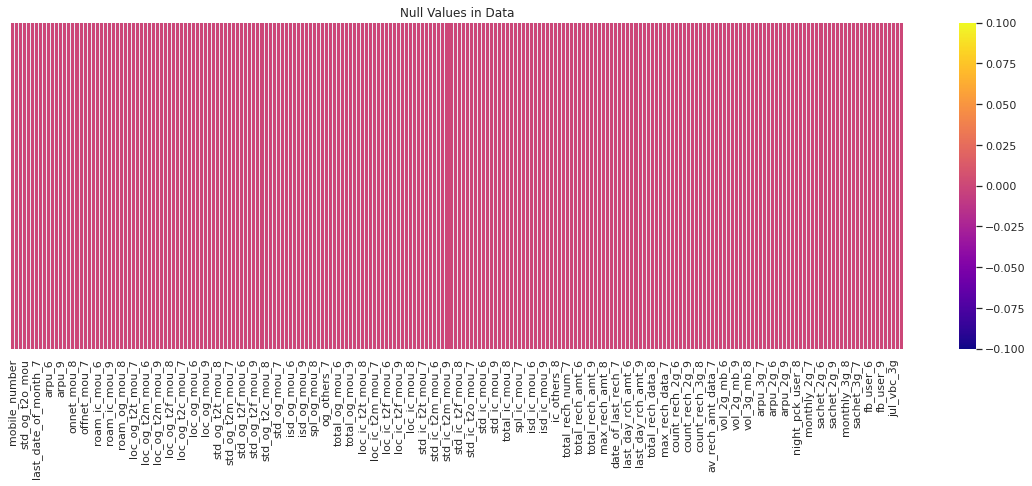

In [33]:
# plotting a heatmap to represent missing values
plt.figure(figsize=(20, 6))
sns.heatmap(telecom_data.isnull(), yticklabels=False, cmap='plasma')
plt.title('Null Values in Data')
plt.show()

In [34]:
# checking missing values with 0%
get_columns_with_missing_values(telecom_data)

There are 0 features having more than 0% missing values


Series([], dtype: float64)

We can observe that there are __NO more columns with Missing values__.
### Removing Columns with 1 Unique value
Checking columns with 1 unique values amd dropping them.

In [35]:
# dropping columns with 1 unique values
for col in telecom_data.columns:
    if telecom_data[col].nunique() == 1:
        print(f"Column {col} has no variation and has only {telecom_data[col].nunique()} values")
        print(f"Unique values of the column {col} are: {telecom_data[col].unique()}")
        print(f"Hence dropping {col}\n")
        telecom_data.drop(col, axis=1, inplace=True)

Column circle_id has no variation and has only 1 values
Unique values of the column circle_id are: [109]
Hence dropping circle_id

Column loc_og_t2o_mou has no variation and has only 1 values
Unique values of the column loc_og_t2o_mou are: [0.]
Hence dropping loc_og_t2o_mou

Column std_og_t2o_mou has no variation and has only 1 values
Unique values of the column std_og_t2o_mou are: [0.]
Hence dropping std_og_t2o_mou

Column loc_ic_t2o_mou has no variation and has only 1 values
Unique values of the column loc_ic_t2o_mou are: [0.]
Hence dropping loc_ic_t2o_mou

Column last_date_of_month_6 has no variation and has only 1 values
Unique values of the column last_date_of_month_6 are: ['6/30/2014']
Hence dropping last_date_of_month_6

Column last_date_of_month_7 has no variation and has only 1 values
Unique values of the column last_date_of_month_7 are: ['7/31/2014']
Hence dropping last_date_of_month_7

Column last_date_of_month_8 has no variation and has only 1 values
Unique values of the co

Feature size after dropping columns with 1 unique values.

In [36]:
# shape of dataframe
telecom_data.shape

(99999, 206)

#### Dropping mobile number column
Dropping mobile number column as it adds no value to our analysis and acts as a ID field

In [37]:
# checking unique value count for mobile number column
telecom_data['mobile_number'].nunique()

99999

In [38]:
telecom_data.drop('mobile_number', axis=1, inplace=True)

In [39]:
telecom_data.shape

(99999, 205)

### Fixing Data Types and Column Names 
#### Fixing Data Type

In [40]:
# getting date columns
date_columns = list(telecom_data.filter(regex='date').columns)
date_columns

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [41]:
# checking object type columns
telecom_data.select_dtypes(include='object').columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9'],
      dtype='object')

We can observe that date columns are of type object.
Hence converting them to pandas datetime data type.

In [42]:
# converting object type column to datetime type
for col in date_columns:
    telecom_data[col] = pd.to_datetime(telecom_data[col], format='%m/%d/%Y')

In [43]:
# checking column types
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99998
Columns: 205 entries, arpu_6 to sep_vbc_3g
dtypes: datetime64[ns](4), float64(168), int64(33)
memory usage: 157.2 MB


We can observe that all the columns are in correct data types.<br>
#### Checking column names

In [44]:
# checking column names with month names
telecom_data.filter(regex='jun|jul|aug|sep').columns

Index(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

We can observe that column names are not standard naming format (_6, _7, _8, _9).

In [45]:
# renaming column name from month to codes
telecom_data.rename(
    columns={'aug_vbc_3g': 'vbc_3g_8', 'jul_vbc_3g': 'vbc_3g_7', 'jun_vbc_3g': 'vbc_3g_6', 'sep_vbc_3g': 'vbc_3g_9'},
    inplace=True
)

### Derived Features
Getting recharge related columns

In [46]:
# check the dataframe shape
telecom_data.shape

(99999, 205)

In [47]:
# getting recharge related columns
telecom_data.filter(regex='rech_amt|rech_data').columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

##### Creating a new column based on recharge amount for data `av_rech_amt_data` and `total_rech_data`

In [48]:
# creating total recharge amount for data
for i in range(6, 9):
    telecom_data['total_rech_amt_data_' + str(i)] = telecom_data['av_rech_amt_data_' + str(i)] * \
                                                    telecom_data['total_rech_data_' + str(i)]

In [49]:
# checking if columns are created
telecom_data.shape

(99999, 208)

We can observe that 3 new columns were created. 
##### Creating a new column based on the total data used by the customer `vol_2g_mb` and `vol_3g_mb`
The total data used is sum of vol_2g_mb and vol_3g_mb.

In [50]:
# creating column for total data used by the customer
for i in range(6, 9):
    telecom_data['total_vol_data_mb_' + str(i)] = telecom_data['vol_2g_mb_' + str(i)] + telecom_data['vol_3g_mb_' + str(i)]

In [51]:
# checking if columns are created
telecom_data.shape

(99999, 211)

##### Creating a new column for average recharge amount in good phase months - Jun and Jul

In [52]:
# creating column for average recharge amount for each customer
telecom_data['total_avg_rech_amt_good_phase'] = (
    telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'] + telecom_data['total_rech_amt_data_6'] + \
    telecom_data['total_rech_amt_data_7']
) / 2

### Filtering High Value Customers
High value customers are defined by business as customers whose __total average recharge amount is above 70th percentile in good phase__. <br>
In our analysis we are concentrating on high value customers, as approximately 80% of revenue comes from the top 20% customers. Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In [53]:
# checking percentile values to find high value customers
telecom_data[
    ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_avg_rech_amt_good_phase']
].quantile([0.1, 0.25, 0.5, 0.7, 0.9])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_data_6,total_rech_amt_data_7,total_avg_rech_amt_good_phase
0.10,0.00,0.00,0.00,0.00,60.00
0.25,109.00,100.00,0.00,0.00,128.00
0.50,230.00,220.00,0.00,0.00,275.00
0.70,378.00,370.00,0.00,0.00,478.00
0.90,732.00,731.00,252.00,309.00,1028.00


In [54]:
# taking the 70th percentile for the calculated total average recharge amount
cutoff_high_value_customer = np.percentile(telecom_data['total_avg_rech_amt_good_phase'], 70)
print(f"70th percentile value for Total average recharge amount: {cutoff_high_value_customer}")

70th percentile value for Total average recharge amount: 478.0


As per the business defination, "Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)".
Hence filtering out other customers based on the business defined cutoff value at 70th percentile.


In [55]:
# filtering out high value customers based on defined business cutoff 
telecom_data = telecom_data[telecom_data['total_avg_rech_amt_good_phase'] > cutoff_high_value_customer]
telecom_data.shape

(29953, 212)

### Churn Customer Defination
As per business defination, Customers who have not used any service, either incoming or outgoing - in terms of calls, internet etc., over a period of time are said to churn off to competitor networks.
#### Tagging Customers as Churn
As per the defination mentioned above, we check the following columns to label customers as churn.
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [56]:
# assigning churn tag to customers
telecom_data['churn'] = np.where(
    ((telecom_data['total_ic_mou_9'] == 0) & (telecom_data['total_og_mou_9'] == 0)) &
    ((telecom_data['vol_2g_mb_9'] == 0) & (telecom_data['vol_3g_mb_9'] == 0)), 1, 0
)

In [57]:
# check the churn value distribution
telecom_data['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [58]:
# check the churn value distribution in percentage
round(100 * (telecom_data['churn'].value_counts()/telecom_data.shape[0]), 2)

0   91.88
1    8.12
Name: churn, dtype: float64

We can observe that there is only __8.12% customers churn off__.<br>
This indicates a __highly imbalanced__  dataset where there is a miniscule churn cases compared to non churners.

#### Dropping Redundant Columns

In [59]:
# dataframe shape
telecom_data.shape

(29953, 213)

In [60]:
# removing columns
for i in range(6, 9):
    telecom_data.drop(['av_rech_amt_data_' + str(i)], axis=1, inplace=True)
    telecom_data.drop(['total_rech_data_' + str(i)], axis=1, inplace=True)

In [61]:
# dataframe shape
telecom_data.shape

(29953, 207)

### Dropping Columns related to September Month (9)
Getting the columns of month september (9)

In [62]:
sept_cols_tobe_dropped = telecom_data.filter(regex='_9').columns
sept_cols_tobe_dropped

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9',
       'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9'],

In [63]:
# dropping all sept columns
telecom_data.drop(sept_cols_tobe_dropped, axis=1, inplace=True)
telecom_data.shape

(29953, 156)

## Exploratory Data Analysis
### Data Visualization
We will analyze the variables or features.<br>
Defining utility methods for plotting.

In [64]:
# to create line plots for given features and comparing against months
def plot_lineplot_monthly(df, column):
    """Function to plot line plots for churn analysis month wise"""
    fig, ax = plt.subplots(figsize=(10,6))
    colList = list(df.filter(regex=(column)).columns)
    colList = colList[:3]
    plt.plot(df.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun', 'Jul', 'Aug'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title(str(column) + " V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(column)
    plt.show()
    return df.groupby('churn')[colList].mean()

In [65]:
# to create mean bar plots for given features
def plot_mean_bar_chart(df, columns_list):
    """Function to plot bar charts for required feature list"""
    df_0 = df[df['churn'] == 0].filter(columns_list)
    df_1 = df[df['churn'] == 1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()], index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()], index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    return mean_bar

In [66]:
# to create scatter plots for given features
def plot_scatter_plot(df, column_list):
    """Function to plot scatter charts for required feature list"""
#     plt.figure(figsize=(20, 16))
    sns.pairplot(data=df[column_list], hue='churn',  diag_kws={'bw': 0.2})
    plt.show()
    

#### Churn

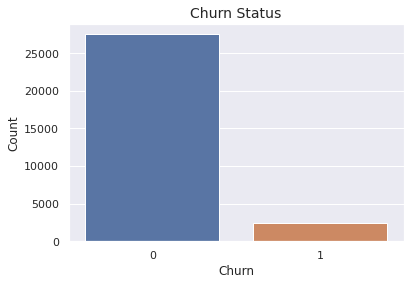

In [67]:
sns.countplot(telecom_data['churn'])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Status', fontsize=14)
plt.show()

#### Average Revenue Per User (arpu)

In [68]:
# get columns related to arpu
telecom_data.filter(regex='arpu').columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')

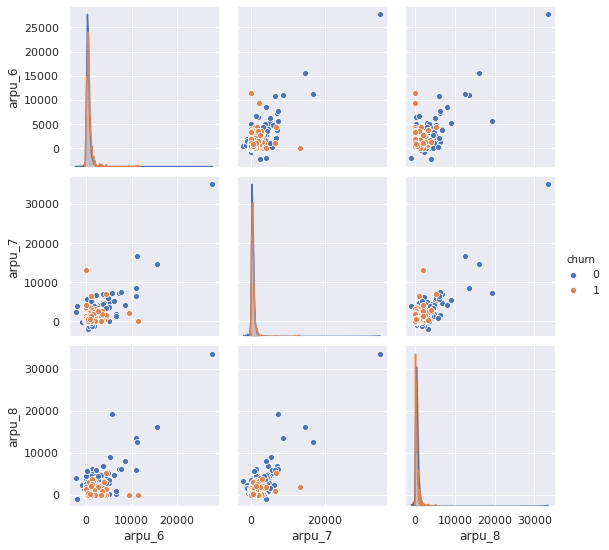

In [69]:
# scatter plot for arpu
plot_scatter_plot(telecom_data, ['arpu_6', 'arpu_7', 'arpu_8', 'churn'])

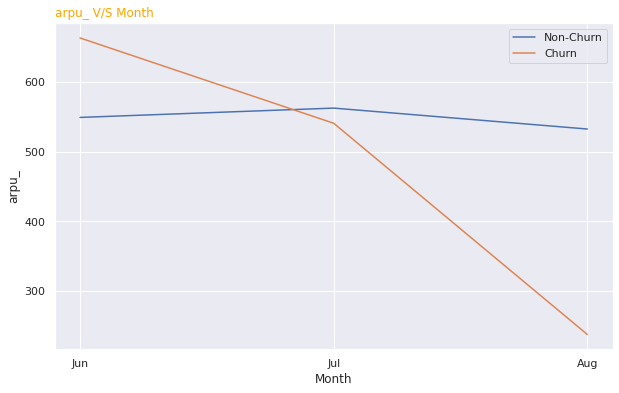

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.55,562.93,532.87
1,663.71,541.15,237.66


In [70]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'arpu_')

We can observe that there is a drastic reduction in average revenue in August for churn customers.<br>
Hence __`arpu` is an important variable__.
#### Recharge Amount Related Features
Analysing recharge amount related features

In [71]:
# get columns related to recharge
telecom_data.filter(regex='rech_amt').columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'total_avg_rech_amt_good_phase'],
      dtype='object')

##### total_rech_amt

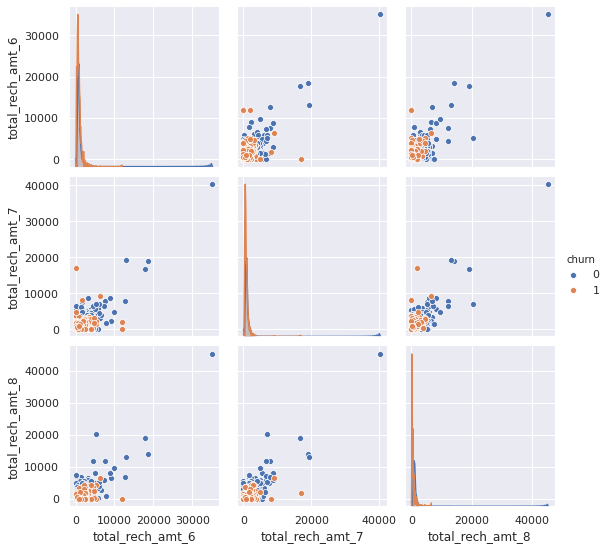

In [72]:
# scatter plot for total_rech_amt
plot_scatter_plot(telecom_data, ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'churn'])

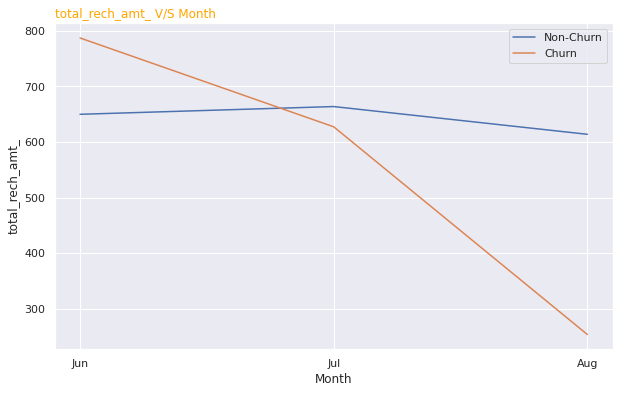

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8
churn,,,
0,649.97,663.89,613.98
1,787.33,627.46,253.69


In [73]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'total_rech_amt_')

We can observe that there is a drastic reduction in total recharge done by customers in August.<br>
Hence __`total_rech_amt` is an important variable__.
##### max_rech_amt

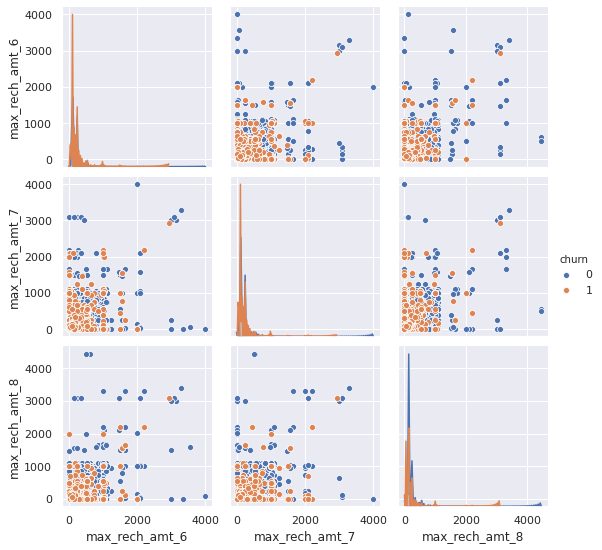

In [74]:
# scatter plot for max_rech_amt
plot_scatter_plot(telecom_data, ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'churn'])

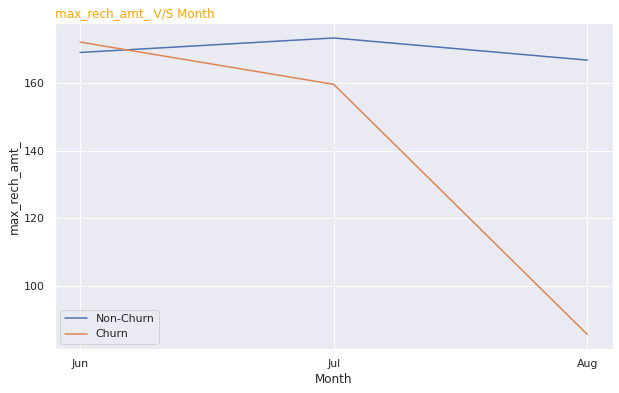

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.10,173.40,166.83
1,172.18,159.66,85.54


In [75]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'max_rech_amt_')

We can observe that there is a steady decline in maximum recharge done by customers towards August.<br>
Hence __`max_rech_amt` is an important variable__.
##### total_rech_amt_data

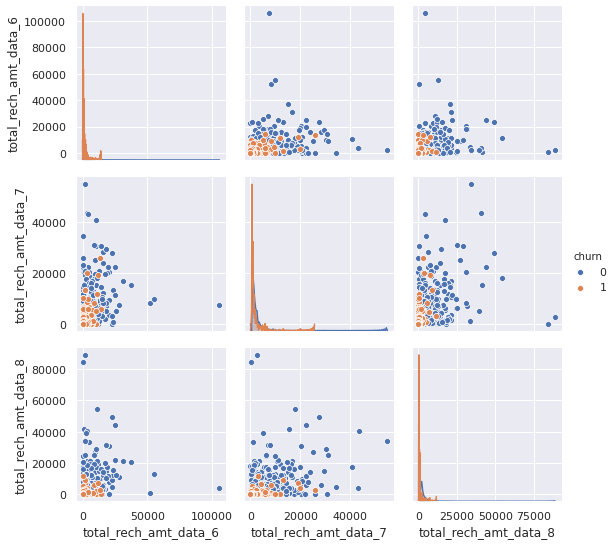

In [76]:
# scatter plot for total_rech_amt_data
plot_scatter_plot(telecom_data, ['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8', 'churn'])

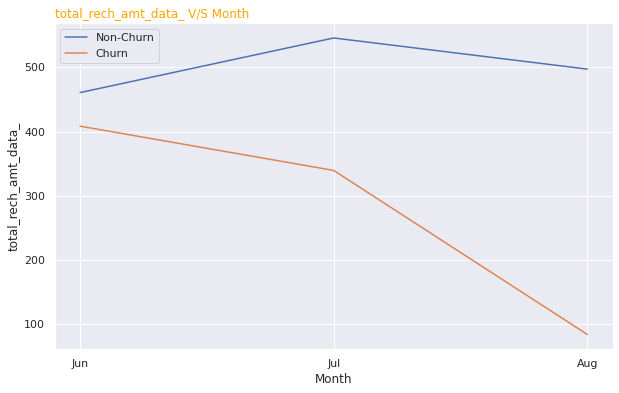

,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
churn,,,
0,460.64,545.72,497.22
1,408.32,339.37,83.80


In [77]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'total_rech_amt_data_')

We can observe that there is a steady decline in total average recharge  for data done by customers towards August.<br>
Hence __`total_rech_amt_data` is an important variable__.
#### Data Related Features
Features with 2g and 3g are filtered out

In [78]:
# get columns related to data (2g and 3g)
telecom_data.filter(regex='2g|3g').columns

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

##### vol_2g_mb

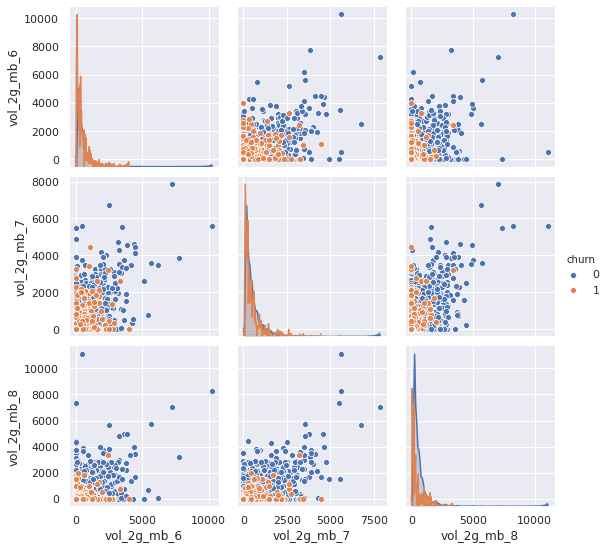

In [79]:
# scatter plot for vol_2g_mb
plot_scatter_plot(telecom_data, ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'churn'])

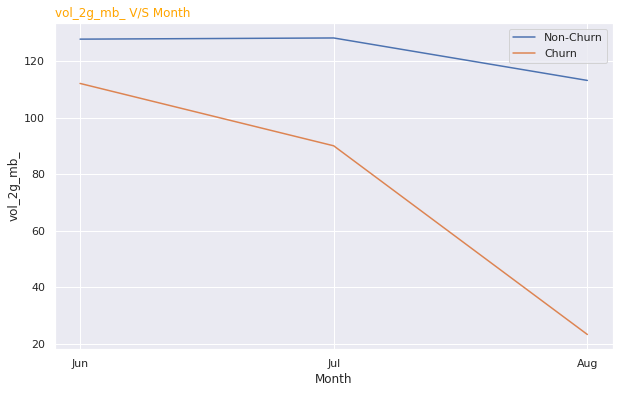

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8
churn,,,
0,127.80,128.21,113.18
1,112.11,90.03,23.23


In [80]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'vol_2g_mb_')

We can observe that there is a drastic reduction in data consumption by customers between July to August.<br>
Hence __`vol_2g_mb` is an important variable__.
##### vol_3g_mb

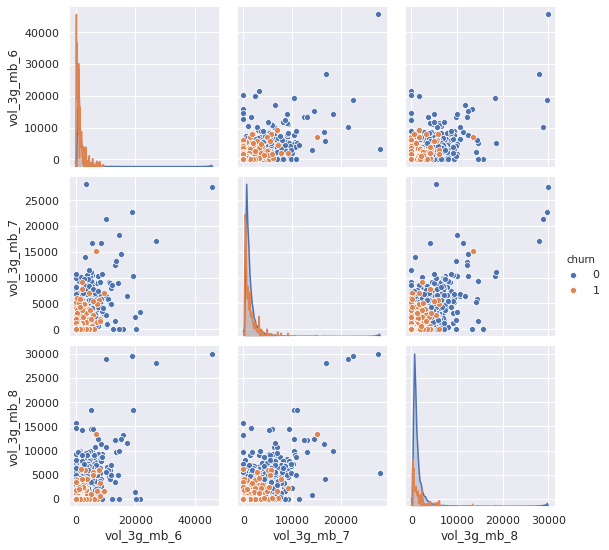

In [81]:
# scatter plot for vol_3g_mb
plot_scatter_plot(telecom_data, ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'churn'])

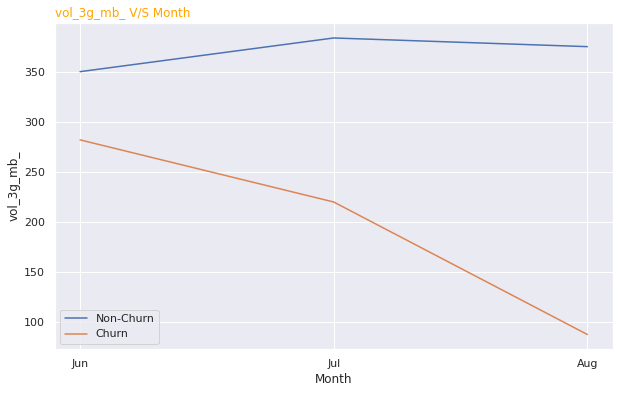

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
churn,,,
0,350.20,383.85,375.18
1,282.06,220.01,87.69


In [82]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'vol_3g_mb_')

We can observe that there is a drastic reduction in 3G data consumption by customers in August.<br>
Hence __`vol_3g_mb` is an important variable__.
##### count_rech_2g

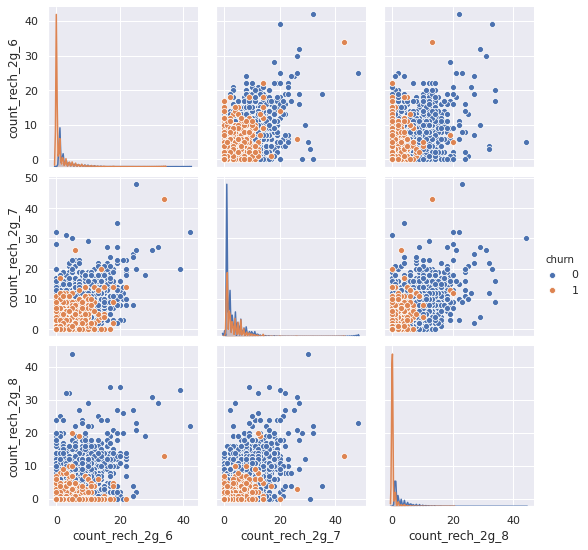

In [83]:
# scatter plot for count_rech_2g
plot_scatter_plot(telecom_data, ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'churn'])

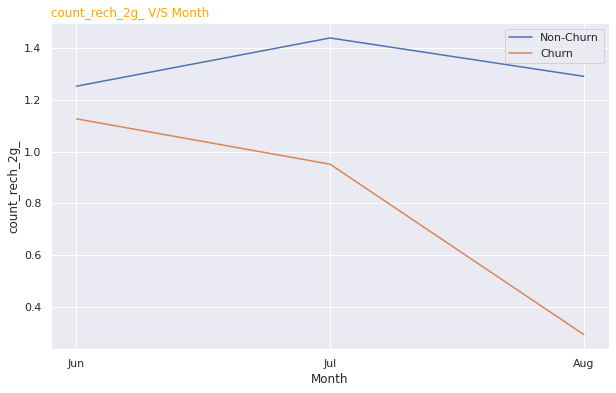

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8
churn,,,
0,1.25,1.44,1.29
1,1.13,0.95,0.29


In [84]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'count_rech_2g_')

We can observe that there is a the frequency of recharge is lesser for churn customers and also the frequency reduces after the good phase.<br>
Hence __`count_rech_2g` is an important variable__.
##### count_rech_3g

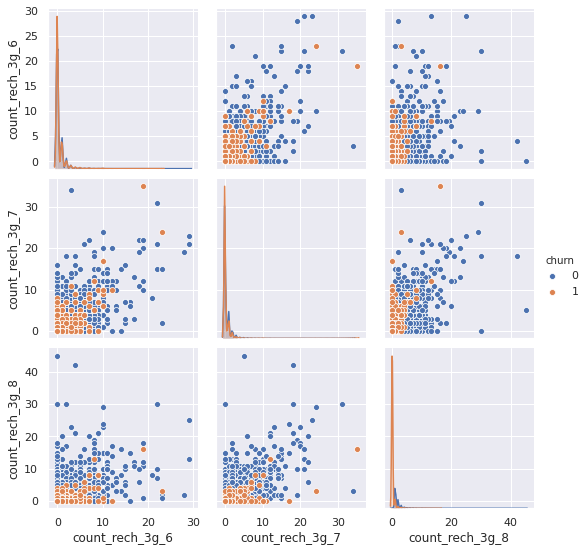

In [85]:
# scatter plot for count_rech_2g
plot_scatter_plot(telecom_data, ['count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'churn'])

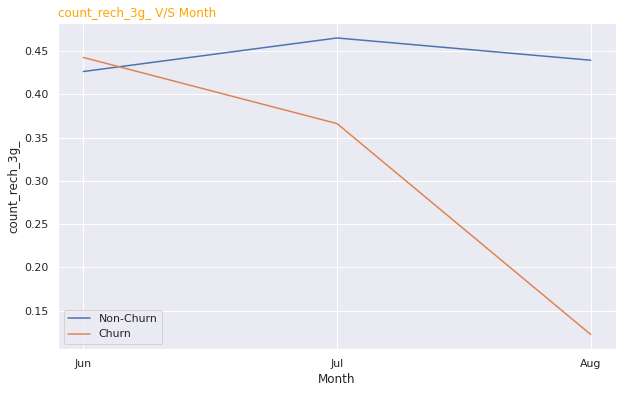

,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
churn,,,
0,0.43,0.47,0.44
1,0.44,0.37,0.12


In [86]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'count_rech_3g_')

We can observe that there is a the frequency of recharge is lesser for churn customers and also the frequency reduces after the good phase.<br>
Hence __`count_rech_3g` is an important variable__.
##### Monthly Data Consumption

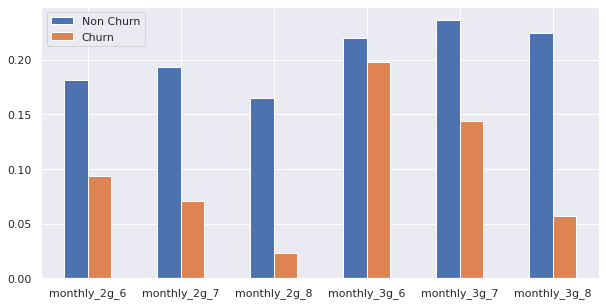

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.18,0.19,0.17,0.22,0.24,0.22
Churn,0.09,0.07,0.02,0.20,0.14,0.06


In [87]:
# bar plot for monthly_2g
plot_mean_bar_chart(
    telecom_data, ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
)

We can observe that there is a gradual decrease in the monthly consumption of 2G/3G data.<br>
Hence __`monthly_2g` and `monthly_3g` is an important variable__.
#### All Incoming Calls

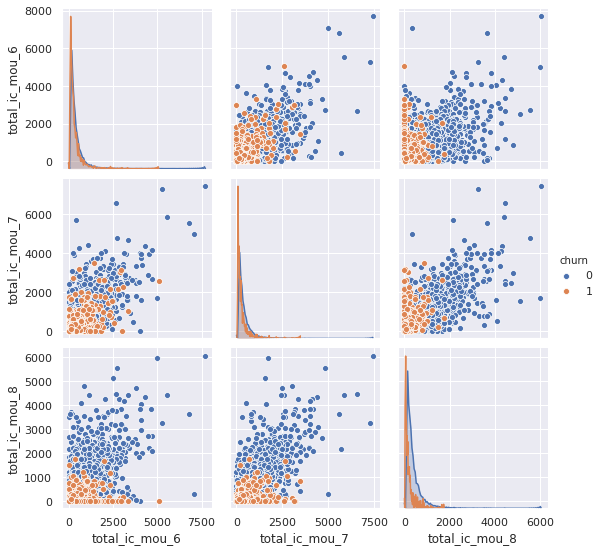

In [88]:
# scatter plots for total_ic_mou
plot_scatter_plot(telecom_data, ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn'])

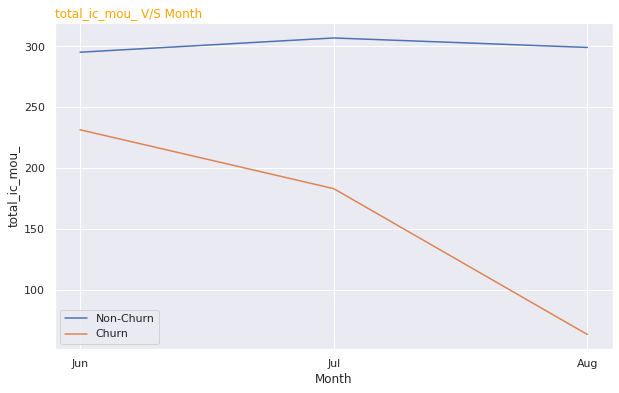

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn,,,
0,295.29,306.99,299.22
1,231.61,183.28,63.54


In [89]:
# plotting line plots
plot_lineplot_monthly(telecom_data, 'total_ic_mou_')

We can observe that there is a gradual decrease in the total number of incoming calls received by the person.<br>
Hence __`total_ic_mou` is an important variable__.
##### Analysis of Continous Variables

In [90]:
# considering continous variables witj categories more than 20
continous_vars = []
for col in telecom_data.columns:
    if telecom_data[col].nunique() > 20:
        continous_vars.append(col)
print("No of continous columns: ", len(continous_vars))

No of continous columns:  143


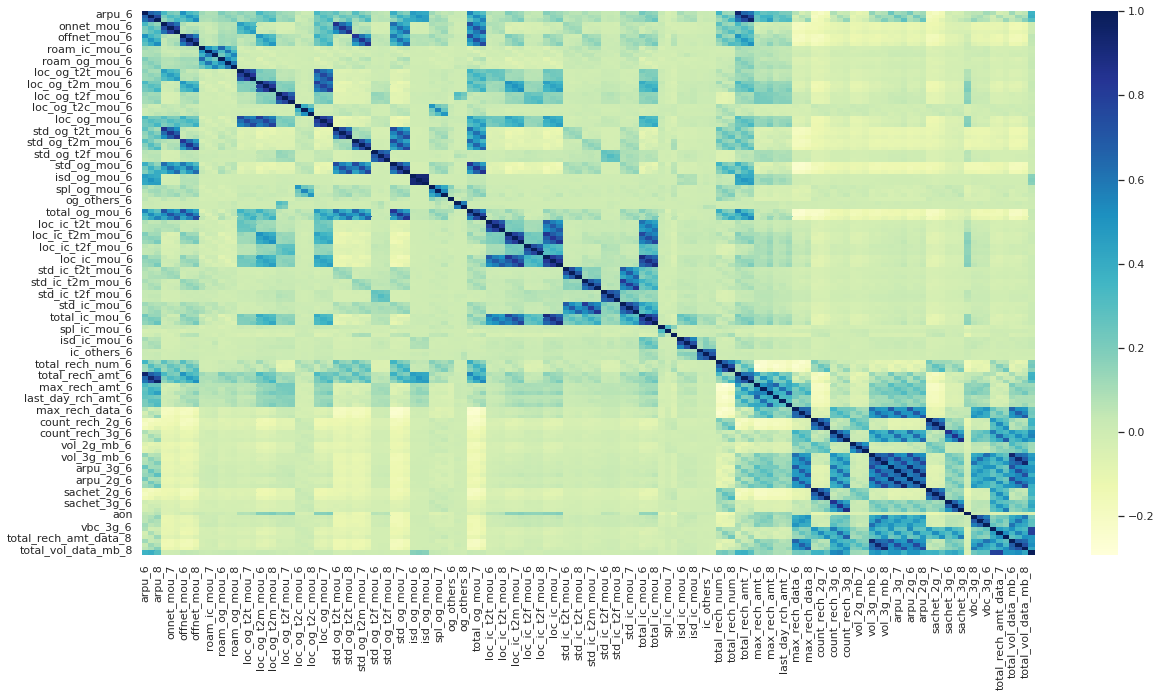

In [91]:
# correlation between numeric variables
plt.figure(figsize=(20, 10))
sns.heatmap(telecom_data[continous_vars].corr(), cmap="YlGnBu")
plt.show()

## Model Building
Defining utility methods for model building.

In [92]:
# utility method to plot ROC curve
def plot_roc_curve(actual_val, pred_val):
    """Function to plot ROC curve"""
    fpr, tpr, thresh = metrics.roc_curve(actual_val, pred_val, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual_val, pred_val)
    
    # plotting roc curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {auc_score: 0.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresh

In [272]:
# utility method to get model metrics
def get_model_metrics(actual_churn, pred_churn, model_name=""):
    confusion = metrics.confusion_matrix(actual_churn, pred_churn)
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    
    # ROC score
    roc_score = round(metrics.roc_auc_score(actual_churn, pred_churn), 2)
    print(f"ROC AUC score: {roc_score}")
    
    # Accuracy
    accuracy = round(metrics.accuracy_score(actual_churn, pred_churn), 2)
    print(f"Accuracy score: {accuracy}")
    
    # Sensitivity/Recall
    recall = TP / float(TP + FN)
    recall = round(recall, 2)
    print(f"Sensitivity/Recall score: {recall}")
    
    # Specificity
    specifity = round((TN / float(TN + FP)), 2)
    print(f"Specificity score: {specifity}")
    
    # Positive Predictive value/Precision
    precision = metrics.precision_score(actual_churn, pred_churn)
    precision = round(precision, 2)
    print(f"Positive Predictive value/Precision score: {precision}")
    
    # Negative predictive value
    negative_score = round((TN / float(TN + FN)), 2)
    print(f"Negative Predictive value: {negative_score}")
    
    # F score
    f_score = round(((2 * precision * recall) / (precision + recall)), 2)
    print(f"F score: {f_score}")
    
    model_metrics_dict = {"model_name":model_name, "roc_auc_score":roc_score, "accuracy":accuracy, "recall":recall, "specificity":specifity,
                         "precision":precision, "negative_score":negative_score, "f_score":f_score}
    return model_metrics_dict

In [94]:
# utility method to plot Lift curve
def plot_lift_curves(actual_val, pred_val, name_of_plot):
    """Function to create lift plots"""
    data_dict = {'actual': list(actual_val), 'pred': list(pred_val)}
    df = pd.DataFrame(data_dict)
    pred_ranks = pd.qcut(df['pred'].rank(method='first'), 100, labels=False)
    actual_ranks = pd.qcut(df['actual'].rank(method='first'), 100, labels=False)
    pred_percentiles = df.groupby(pred_ranks).mean()
    actual_percentiles = df.groupby(actual_ranks).mean()
    
    # plotting lift curve
    plt.figure(figsize=(10, 6))
    plt.title(name_of_plot)
    plt.plot(np.arange(.01, 1.01, .01), np.array(pred_percentiles['pred']), color='darkorange', lw=2, label='Prediction')
    plt.plot(
        np.arange(.01, 1.01, .01), np.array(pred_percentiles['actual']), color='navy', lw=2, linestyle='--', label='Actual'
    )
    plt.ylabel('Target Percentile')
    plt.xlabel('Population Percentile')
    plt.xlim([0.0, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.legend(loc="best")
    plt.show()

In [95]:
# utility method to fit the model and perform prediction
def fit_model(model, X_train, y_train, perform_cv=True, cv_folds=5):
    """Function to fit the model and predict"""
    model.fit(X_train, y_train)
        
    # Predict training set
    d_train_predictions = model.predict(X_train)
    d_train_pred_prob = model.predict_proba(X_train)[:, 1]
    
    # perform cross-validation
    if perform_cv:
        cv_score = cross_val_score(model, X_train, y_train, cv=cv_folds, scoring='roc_auc')
        print(
            f"CV Score: Mean - {round(np.mean(cv_score), 2)} | Std - {round(np.std(cv_score), 2)} \
            | Min - {round(np.min(cv_score), 2)} | Max - {round(np.max(cv_score), 2)}"
        )
    
    # get model metrics
    get_model_metrics(y_train, d_train_predictions)
    print(f"AUC Score (Train): {round(metrics.roc_auc_score(y_train, d_train_pred_prob), 2)}")

In [300]:
# utility method to predict churn with probabilities based on a cutoff
def predict_prob_churn(model, X_train, y_train, cut_off):
    """Function to predict churn with probabilities based on a cutoff"""
    pred_probs = model.predict_proba(X_train)[:, 1]
    
    df = pd.DataFrame({'churn': y_train, 'churn_prob': pred_probs})
    df['final_predicted'] = df['churn_prob'].map(lambda x: 1 if x > cut_off else 0)
    # get metrics
    get_model_metrics(df['churn'], df['final_predicted'])
    return df

In [307]:
# utility method to get optimal cutoff
def get_optimal_cutoff(df):
    """Function to get the optimal cutoff for classification"""
    cutoff_cols = [float(i)/10 for i in range(10)]
    for col in cutoff_cols:
        df['churn_' + str(col)] = df['churn'].map(lambda x: 1 if x > col else 0)
    

    # calculating accuracy, sensitivity and specificity for various probability cutoffs
    cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
    for col in cutoff_cols:
        confusion = metrics.confusion_matrix(df['churn'], df['churn_' + str(col)])
        total = sum(sum(confusion))
        accuracy = (confusion[0,0] + confusion[1,1]) / total
        speci = confusion[0,0] / (confusion[0,0] + confusion[0,1])
        sensi = confusion[1,1] / (confusion[1,0] + confusion[1,1])
        cutoff_df.loc[col] = [col, accuracy, sensi, speci]
    # plotting accuracy, sensitivity and specificity for various cutoffs
    plt.figure(figsize=(10, 6))
    cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
    plt.show()
    return cutoff_df

In [98]:
# utility method to create a scree plot
def create_scree_plot(pca):
    """Function to create a scree plot"""
    fig = plt.figure(figsize = (8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

#### Taking a Copy of Data¶

In [99]:
# taking a copy
telecom_hv_cust_data = telecom_data.copy()

#### Dropping Date columns

In [100]:
# removing the datatime columns before modelling
date_time_cols = list(telecom_hv_cust_data.select_dtypes(include=['datetime64']).columns)
print(date_time_cols)
telecom_hv_cust_data.drop(date_time_cols, axis=1, inplace=True)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [101]:
# shape of dataframe
telecom_hv_cust_data.shape

(29953, 153)

#### Train-Test Split

In [102]:
y = telecom_hv_cust_data.pop('churn')
X = telecom_hv_cust_data
print(y.shape, X.shape)

(29953,) (29953, 152)


In [103]:
# Splitting the data into train and test
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

print("Training dataset size: ", X_train.shape)
print("Training dataset target size: ", y_train.shape)
print("Test dataset size: ", X_test.shape)
print("Test dataset target size: ", y_test.shape)

Training dataset size:  (20967, 152)
Training dataset target size:  (20967,)
Test dataset size:  (8986, 152)
Test dataset target size:  (8986,)


#### Scaling Data
Using StandardScaler to normalize the data.

In [104]:
# instantiate standardscaler
scaler = StandardScaler()

In [105]:
# fitting and transforming the scaler on train
X_train_scaled = scaler.fit_transform(X_train)

# transforming the test using the already fit scaler
X_test_scaled = scaler.transform(X_test)

#### Handling Class Imbalance
This is required to handle the issues of overfitting and prevent loss of information due to highly biased data. <br>
Some classifier algorithms have higher bias and they tend to predict higher class data and the lower class data features are generally ignored.<br>
Hence we perform __Informed Over Sampling__ using ___Synthetic Minority Over-sampling Technique (SMOTE)___.

In [106]:
print(f"Before OverSampling, counts of label '1': {sum(y_train== 1)}")
print(f"Before OverSampling, counts of label '0': {sum(y_train == 0)}\n")
print(f"Before OverSampling, churn event rate : {round(sum(y_train == 1) / len(y_train) * 100, 2)}%")

Before OverSampling, counts of label '1': 1752
Before OverSampling, counts of label '0': 19215

Before OverSampling, churn event rate : 8.36%


In [107]:
# performing over sampling
smote = SMOTE(random_state=12)

In [108]:
# fitting smote
X_train_smt, y_train_smt = smote.fit_sample(X_train_scaled, y_train)

In [109]:
print(f"After OverSampling, the shape of train_X: {X_train_smt.shape}")
print(f"After OverSampling, the shape of train_y: {y_train_smt.shape}\n")

print(f"After OverSampling, counts of label '1': {sum(y_train_smt == 1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_smt == 0)}")
print(f"After OverSampling, churn event rate : {round(sum(y_train_smt == 1) / len(y_train_smt) * 100, 2)}%")

After OverSampling, the shape of train_X: (38430, 152)
After OverSampling, the shape of train_y: (38430,)

After OverSampling, counts of label '1': 19215
After OverSampling, counts of label '0': 19215
After OverSampling, churn event rate : 50.0%


## Models 

### 1) Logistic Regression

In [131]:
# creating LogisticRegression model
log_reg_base_model = LogisticRegression()

In [132]:
# fitting the model
fit_model(model=log_reg_base_model, X_train=X_train_smt, y_train=y_train_smt)

CV Score: Mean - 0.92 | Std - 0.0             | Min - 0.91 | Max - 0.92
ROC AUC score: 0.85
Accuracy score: 0.85
Sensitivity/Recall score: 0.87
Specificity score: 0.83
Positive Predictive value/Precision score: 0.84
Negative Predictive value: 0.86
F score: 0.85
AUC Score (Train): 0.92


In [133]:
# Logistic regression model summary
logm1 = sm.GLM(y_train_smt,(sm.add_constant(X_train_smt)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38430
Model:                            GLM   Df Residuals:                    38287
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13476.
Date:                Mon, 25 Jan 2021   Deviance:                       26952.
Time:                        12:56:18   Pearson chi2:                 1.43e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1069      0.035    -59.679      0.000      -2.176      -2.038
x1             0.1097      0.066      1.669      0.095      -0.019       0.239
x2             0.1638      0.086      1.897      0.058      -0.005       0.333
x3             0.6726      0.099      6.767      0.000       0.478       0.867
x4             9.3857      2.388      3.930      0.000       4.705      14.067
x5           -11.0699      1.439     -7.691      0.000     -13.891      -8.249
x6             5.6806      1.603      3.544      0.000       2.539       8.822
x7            10.3800      2.561      4.053      0.000       5.360      15.400
x8           -12.2879      1.497     -8.210      0.000     -15.221      -9.355
x9             4.5914      1.733      2.650      0.008       1.195       7.987
x10            0.0784      0.025      3.095      0.002       0.029       0.128
x11            0.0652      0.027      2.427      0.015       0.013       0.118
x12           -0.0802      0.022     -3.631      0.000      -0.124      -0.037
x13           -2.6162      0.628     -4.167      0.000      -3.847      -1.386
x14            2.4686      0.292      8.455      0.000       1.896       3.041
x15           -1.0654      0.351     -3.031      0.002      -1.754      -0.377
x16         3026.3553    719.475      4.206      0.000    1616.210    4436.501
x17        -1099.1268    760.345     -1.446      0.148   -2589.376     391.122
x18         6734.5216    724.522      9.295      0.000    5314.485    8154.558
x19         3335.3071    792.978      4.206      0.000    1781.100    4889.515
x20        -1106.7747    765.841     -1.445      0.148   -2607.795     394.245
x21         7299.5973    785.225      9.296      0.000    5760.584    8838.611
x22          281.4485     66.910      4.206      0.000     150.307     412.590
x23          -97.1349     67.101     -1.448      0.148    -228.650      34.381
x24          615.3895     66.194      9.297      0.000     485.652     745.127
x25           -0.0774      0.024     -3.191      0.001      -0.125      -0.030
x26            0.1808      0.029      6.309      0.000       0.125       0.237
x27            0.0044      0.026      0.167      0.868      -0.047       0.056
x28        -5699.9826   1489.641     -3.826      0.000   -8619.626   -2780.339
x29        -1132.3377   1550.993     -0.730      0.465   -4172.228    1907.553
x30        -5623.3848   1592.107     -3.532      0.000   -8743.857   -2502.913
x31          346.8207   1599.939      0.217      0.828   -2789.002    3482.644
x32        -2371.0181   1691.688     -1.402      0.161   -5686.665     944.629
x33         4292.8805   1762.476      2.436      0.015     838.492    7747.269
x34          360.0201   1662.283      0.217      0.829   -2897.995    3618.035
x35        -2506.0232   1788.512     -1.401      0.161   -6011.442     999.396
x3

In [137]:
# running RFE with 50 variables as output
rfe = RFE(log_reg_base_model, 50)             
rfe = rfe.fit(X_train_smt, y_train_smt)

In [138]:
# RFE important column
rfe.support_

array([False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False,  True,  True,  True, False, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True,

In [139]:
# rfe ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 8),
 ('arpu_7', True, 1),
 ('arpu_8', False, 22),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', False, 27),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 60),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 33),
 ('roam_ic_mou_7', False, 45),
 ('roam_ic_mou_8', False, 46),
 ('roam_og_mou_6', False, 41),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 44),
 ('loc_og_t2t_mou_6', False, 70),
 ('loc_og_t2t_mou_7', False, 86),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 9),
 ('loc_og_t2m_mou_7', False, 5),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 50),
 ('loc_og_t2f_mou_7', False, 87),
 ('loc_og_t2f_mou_8', False, 95),
 ('loc_og_t2c_mou_6', False, 62),
 ('loc_og_t2c_mou_7', False, 23),
 ('loc_og_t2c_mou_8', False, 94),
 ('loc_og_mou_6', False, 61),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', False, 4),
 ('std_og_t2t_mou_8', Tru

In [140]:
# Getting List of Top 50 Variables
rfe_top_columns = X_train.columns[rfe.support_]
rfe_top_columns

Index(['arpu_7', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_7', 'offnet_mou_8',
       'roam_og_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'isd_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_7', 'ic_others_6',
       'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'vol_2g_mb_8', 'arpu_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_7', 'fb_user_8', 'aon', 'vbc_3g_8',
       'total_avg_rech_amt_good_phase'],
      dtype='object')

In [141]:
# Variables that RFE is considering less significant
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_7', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_8',
       'loc_og_t2t_mou_6',
       ...
       'fb_user_6', 'fb_user_7', 'vbc_3g_7', 'vbc_3g_6',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'total_vol_data_mb_6', 'total_vol_data_mb_7',
       'total_vol_data_mb_8'],
      dtype='object', length=102)

In [142]:
# filtering out the important column 
X_train_rfe = X_train[rfe_top_columns]
X_test_rfe = X_test[rfe_top_columns]

In [143]:
# rescaling the filtered column

# fitting and transforming the scaler on train
X_train_rfe_scaled = scaler.fit_transform(X_train_rfe)

# transforming the test using the already fit scaler
X_test_rfe_scaled = scaler.transform(X_test_rfe)

In [144]:
# fitting smote
X_train_rfe_smt, y_train_rfe_smt = smote.fit_sample(X_train_rfe_scaled, y_train)

In [145]:
print(f"After OverSampling, the shape of train_X: {X_train_rfe_smt.shape}")
print(f"After OverSampling, the shape of train_y: {y_train_rfe_smt.shape}\n")

print(f"After OverSampling, counts of label '1': {sum(y_train_rfe_smt == 1)}")
print(f"After OverSampling, counts of label '0': {sum(y_train_rfe_smt == 0)}")
print(f"After OverSampling, churn event rate : {round(sum(y_train_rfe_smt == 1) / len(y_train_rfe_smt) * 100, 2)}%")

After OverSampling, the shape of train_X: (38430, 50)
After OverSampling, the shape of train_y: (38430,)

After OverSampling, counts of label '1': 19215
After OverSampling, counts of label '0': 19215
After OverSampling, churn event rate : 50.0%


In [146]:
# creating LogisticRegression model
# fitting the model
fit_model(model=log_reg_base_model, X_train=X_train_rfe_smt, y_train=y_train_rfe_smt)

CV Score: Mean - 0.91 | Std - 0.0             | Min - 0.91 | Max - 0.92
ROC AUC score: 0.84
Accuracy score: 0.84
Sensitivity/Recall score: 0.86
Specificity score: 0.82
Positive Predictive value/Precision score: 0.83
Negative Predictive value: 0.85
F score: 0.84
AUC Score (Train): 0.91


In [310]:
# precition on test data
test_pred_prob = log_reg_base_model.predict(X_test_rfe_scaled)
lr_base_metrics_dict = get_model_metrics(actual_churn=y_test, pred_churn=test_pred_prob, model_name="Logistic Regression Basic")

ROC AUC score: 0.83
Accuracy score: 0.82
Sensitivity/Recall score: 0.84
Specificity score: 0.82
Positive Predictive value/Precision score: 0.27
Negative Predictive value: 0.98
F score: 0.41


In [148]:
# predicting probality on the train data
train_pred_prob = log_reg_base_model.predict_proba(X_train_rfe_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

0.91


In [149]:
# predicting probality on the test data
test_pred_prob = log_reg_base_model.predict_proba(X_test_rfe_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.89


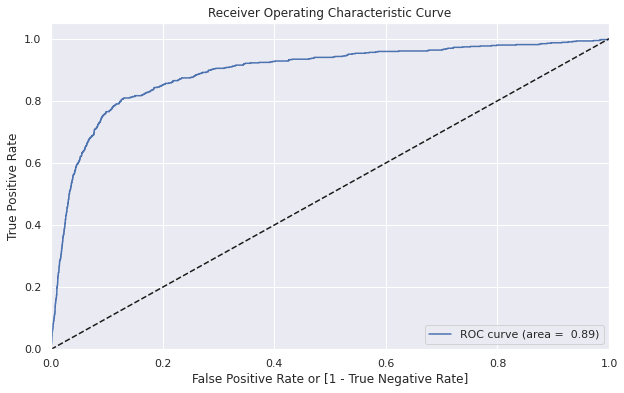

(array([0.        , 0.        , 0.        , ..., 0.99987959, 1.        ,
        1.        ]),
 array([0.        , 0.00146843, 0.00293686, ..., 0.99853157, 0.99853157,
        1.        ]),
 array([1.99999396e+00, 9.99993960e-01, 9.99973690e-01, ...,
        8.06337214e-23, 2.92195981e-32, 5.57931138e-77]))

In [150]:
# plotting ROC curve for actual v/s pred comparision
plot_roc_curve(y_test.values, test_pred_prob)

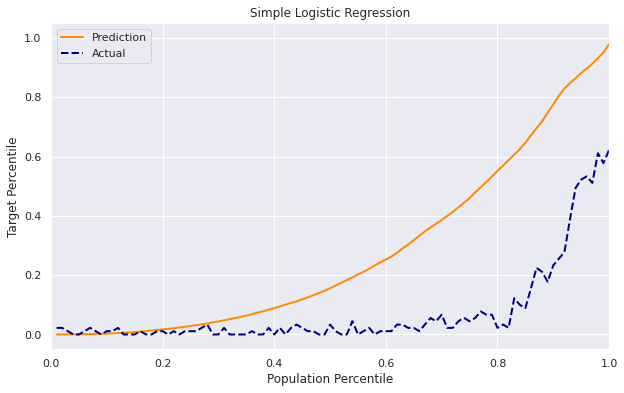

In [152]:
# plotting lift curve for actual v/s pred comparison
plot_lift_curves(y_test.values, test_pred_prob, "Simple Logistic Regression")

### 2) Logistic Regression with PCA 

#### PCA

In [153]:
# initiating pca
pca = PCA(svd_solver='randomized', random_state=42)

In [154]:
# pca on train data
pca.fit(X_train_smt)

PCA(random_state=42, svd_solver='randomized')

In [155]:
pca.components_

array([[-7.02307984e-02, -5.32698420e-02, -1.59806488e-02, ...,
         1.66530466e-01,  1.34252821e-01,  8.55782420e-02],
       [ 1.50212339e-01,  1.87410774e-01,  1.84188095e-01, ...,
         7.60643263e-02,  8.63533278e-02,  8.63948487e-02],
       [ 9.02946554e-02,  8.45452099e-02,  4.12894189e-02, ...,
         8.85366142e-02,  7.40883826e-02,  9.90048666e-02],
       ...,
       [ 0.00000000e+00, -7.87614440e-17,  6.59631867e-17, ...,
         9.41319330e-02, -1.94735362e-01,  1.52516261e-03],
       [-0.00000000e+00, -3.34404010e-17, -1.67083333e-16, ...,
         1.38933388e-01, -1.25920918e-01, -1.94055987e-02],
       [ 0.00000000e+00, -6.95105417e-18,  6.29798858e-17, ...,
        -2.37275466e-01,  3.04763332e-02, -4.61144398e-01]])

In [156]:
# checking variance explained by first 60 PCs
pca.explained_variance_ratio_[:60]

array([0.11621   , 0.09095495, 0.06287848, 0.05078364, 0.04171018,
       0.03485276, 0.0324503 , 0.03134072, 0.02424008, 0.02297873,
       0.02244754, 0.01933482, 0.01792092, 0.01717228, 0.01605314,
       0.01542173, 0.01374759, 0.01361125, 0.01292964, 0.01255529,
       0.01184404, 0.01059283, 0.01038229, 0.00990877, 0.00952677,
       0.00920552, 0.0090793 , 0.00880054, 0.00842329, 0.00823997,
       0.00793036, 0.00753895, 0.00751147, 0.00721947, 0.00685197,
       0.00654494, 0.00628928, 0.00606249, 0.00592026, 0.00580752,
       0.00546174, 0.00538028, 0.00524662, 0.00514664, 0.00503506,
       0.00496627, 0.00492422, 0.00458797, 0.00447497, 0.00435807,
       0.00420279, 0.00412314, 0.00394747, 0.00382749, 0.00369695,
       0.00367932, 0.00347137, 0.00331554, 0.00323619, 0.00312664])

In [157]:
# creating dataframe for PCs
cols = list(X.columns)
pca_df = pd.DataFrame({'PC1': pca.components_[0],'PC2': pca.components_[1], 'Feature': cols})
pca_df.head(10)

,PC1,PC2,Feature
0,-0.07,0.15,arpu_6
1,-0.05,0.19,arpu_7
2,-0.02,0.18,arpu_8
3,-0.14,0.06,onnet_mou_6
4,-0.12,0.08,onnet_mou_7
5,-0.08,0.09,onnet_mou_8
6,-0.15,0.12,offnet_mou_6
7,-0.13,0.14,offnet_mou_7
8,-0.07,0.13,offnet_mou_8
9,-0.02,0.02,roam_ic_mou_6


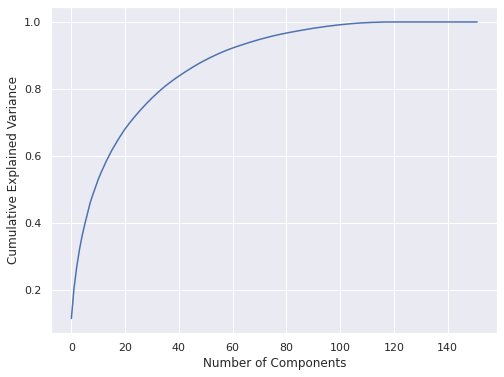

In [158]:
# creating a scree plot
create_scree_plot(pca)

We can observe here that 60 components explain around 90% variance in the dataset.
Hence we can perform Incremental PCA for efficient execution over large datasets.

In [159]:
# performing IncrementalPCA
inc_pca = IncrementalPCA(n_components=60)

In [160]:
X_train_pca = inc_pca.fit_transform(X_train_smt)
X_train_pca.shape

(38430, 60)

In [161]:
# creating correlation matrix for the principal components
corr_mat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corr_mat_nodiag = corr_mat - np.diagflat(corr_mat.diagonal())
print("MAX corr: ", corr_mat_nodiag.max(), ", MIN corr: ", corr_mat_nodiag.min())

MAX corr:  0.018093936127918948 , MIN corr:  -0.03627005451901534


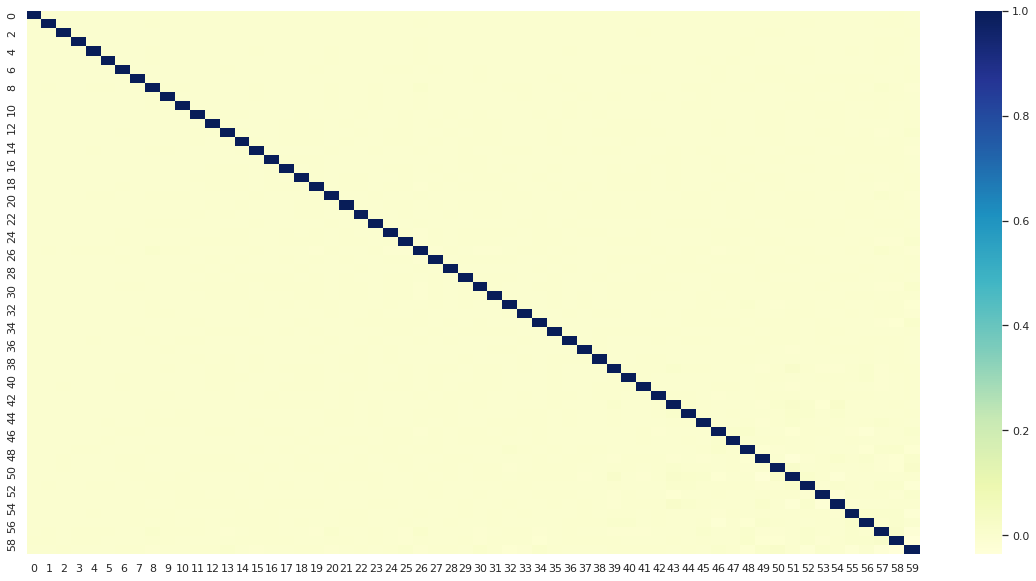

In [162]:
# heatmap for correlation
plt.figure(figsize = (20,10))
sns.heatmap(corr_mat, annot=False, cmap='YlGnBu')
plt.show()

We can observe that there is no correlation among the principal components.<br>
Hence applying the pca transformation to test dataset.

In [163]:
# applying selected components to the test data - 60 components
X_test_pca = inc_pca.transform(X_test_scaled)
X_test_pca.shape

(8986, 60)

#### Logistic Regression with PCA

In [164]:
# creating LogisticRegression model
log_reg_pca_model = LogisticRegression()

In [165]:
# fitting the model
fit_model(model=log_reg_pca_model, X_train=X_train_pca, y_train=y_train_smt)

CV Score: Mean - 0.91 | Std - 0.01             | Min - 0.91 | Max - 0.92
ROC AUC score: 0.84
Accuracy score: 0.84
Sensitivity/Recall score: 0.86
Specificity score: 0.82
Positive Predictive value/Precision score: 0.83
Negative Predictive value: 0.85
F score: 0.84
AUC Score (Train): 0.91


In [311]:
# precition on test data
test_pred_prob = log_reg_pca_model.predict(X_test_pca)
lr_pca_metrics_dict = get_model_metrics(actual_churn=y_test, pred_churn=test_pred_prob, model_name="Logistic Regression with PCA")

ROC AUC score: 0.83
Accuracy score: 0.82
Sensitivity/Recall score: 0.84
Specificity score: 0.82
Positive Predictive value/Precision score: 0.27
Negative Predictive value: 0.98
F score: 0.41


In [167]:
# predicting probality on the train data
train_pred_prob = log_reg_pca_model.predict_proba(X_train_pca)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

0.91


In [168]:
# predicting probality on the test data
test_pred_prob = log_reg_pca_model.predict_proba(X_test_pca)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.89


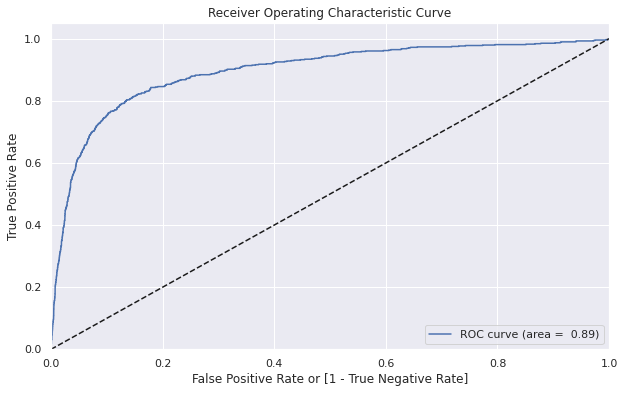

(array([0.        , 0.        , 0.        , ..., 0.99987959, 1.        ,
        1.        ]),
 array([0.        , 0.00146843, 0.00293686, ..., 0.99853157, 0.99853157,
        1.        ]),
 array([1.99979821e+00, 9.99798209e-01, 9.99066989e-01, ...,
        2.19650307e-22, 2.41858142e-23, 1.30303390e-57]))

In [169]:
# plotting ROC curve for actual v/s pred comparision
plot_roc_curve(y_test.values, test_pred_prob)

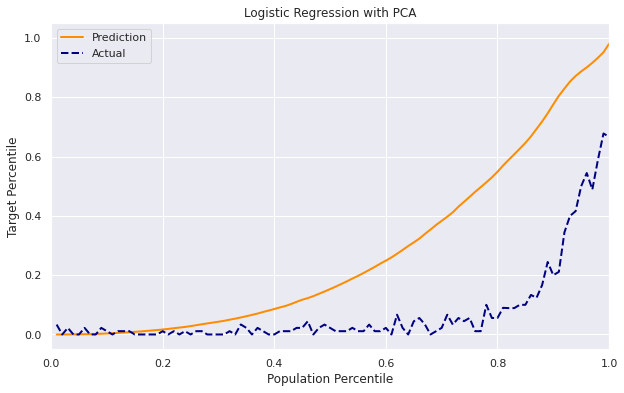

In [171]:
# plotting lift curve for actual v/s pred comparison
plot_lift_curves(y_test.values, test_pred_prob, "Logistic Regression with PCA")

## 3) Logistic Regression with PCA + Penalty L2 

In [316]:
# creating LogisticRegression model
log_reg_penalty_model = LogisticRegression(penalty='l2')

In [317]:
# fitting the model
fit_model(model=log_reg_penalty_model, X_train=X_train_pca, y_train=y_train_smt)

CV Score: Mean - 0.91 | Std - 0.01             | Min - 0.91 | Max - 0.92
ROC AUC score: 0.84
Accuracy score: 0.84
Sensitivity/Recall score: 0.86
Specificity score: 0.82
Positive Predictive value/Precision score: 0.83
Negative Predictive value: 0.85
F score: 0.84
AUC Score (Train): 0.91


In [324]:
# precition on test data
test_pred_prob = log_reg_penalty_model.predict(X_test_pca)
lr_pca_penalty_metrics_dict = get_model_metrics(actual_churn=y_test, pred_churn=test_pred_prob, model_name="Logistic Regression with PCA and L2 Penalty")

ROC AUC score: 0.83
Accuracy score: 0.82
Sensitivity/Recall score: 0.84
Specificity score: 0.82
Positive Predictive value/Precision score: 0.27
Negative Predictive value: 0.98
F score: 0.41


In [319]:
# predicting probality on the train data
train_pred_prob = log_reg_penalty_model.predict_proba(X_train_pca)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

0.91


In [320]:
# predicting probality on the test data
test_pred_prob = log_reg_penalty_model.predict_proba(X_test_pca)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.89


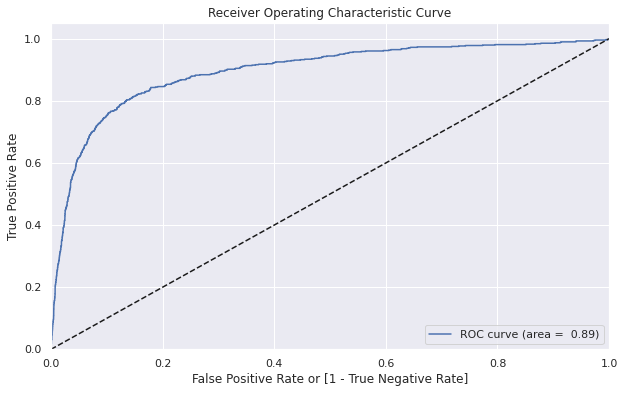

(array([0.        , 0.        , 0.        , ..., 0.99987959, 1.        ,
        1.        ]),
 array([0.        , 0.00146843, 0.00293686, ..., 0.99853157, 0.99853157,
        1.        ]),
 array([1.99979821e+00, 9.99798209e-01, 9.99066989e-01, ...,
        2.19650307e-22, 2.41858142e-23, 1.30303390e-57]))

In [176]:
# plotting ROC curve for actual v/s pred comparision
plot_roc_curve(y_test.values, test_pred_prob)

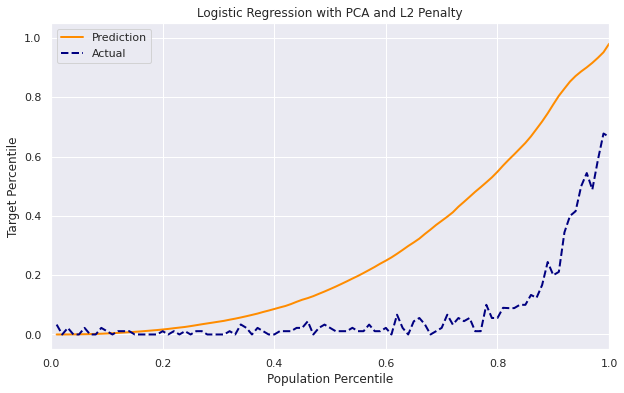

In [321]:
# plotting lift curve for actual v/s pred comparison
plot_lift_curves(y_test.values, test_pred_prob, "Logistic Regression with PCA and L2 Penalty")

### 4) Decision Tree 

In [179]:
# creating decision model with max_depth = 4
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [180]:
# fitting the model
fit_model(model=dt_base, X_train=X_train_smt, y_train=y_train_smt)


CV Score: Mean - 0.92 | Std - 0.01             | Min - 0.9 | Max - 0.92
ROC AUC score: 0.86
Accuracy score: 0.86
Sensitivity/Recall score: 0.88
Specificity score: 0.84
Positive Predictive value/Precision score: 0.85
Negative Predictive value: 0.88
F score: 0.87
AUC Score (Train): 0.92


In [181]:
# precition on test data
test_pred_prob = dt_base.predict(X_test_scaled)
get_model_metrics(actual_churn=y_test, pred_churn=test_pred_prob)

ROC AUC score: 0.83
Accuracy score: 0.84
Sensitivity/Recall score: 0.81
Specificity score: 0.84
Positive Predictive value/Precision score: 0.29
Negative Predictive value: 0.98
F score: 0.43


In [182]:
# predicting probality on the train data
train_pred_prob = dt_base.predict_proba(X_train_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

0.92


In [183]:
# predicting probality on the test data
test_pred_prob = dt_base.predict_proba(X_test_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.89


In [184]:
# Hyperparameter Tunning

dt_ht = DecisionTreeClassifier(random_state=42)

params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500],
    "criterion": ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(estimator=dt_ht,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [185]:
# fitting the model
# fit_model(model=dt_grid_search, X_train=X_train_smt, y_train=y_train_smt)
dt_grid_search.fit(X_train_smt, y_train_smt)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  6.0min finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='recall', verbose=1)

In [186]:
dt_grid_search.best_score_

0.9252665664136157

In [187]:
dt_best = dt_grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [276]:
# precition on test data
test_pred_prob = dt_best.predict(X_test_scaled)
dt_metrics_dict = get_model_metrics(actual_churn=y_test, pred_churn=test_pred_prob, model_name="Decision Tree")

ROC AUC score: 0.81
Accuracy score: 0.88
Sensitivity/Recall score: 0.73
Specificity score: 0.9
Positive Predictive value/Precision score: 0.37
Negative Predictive value: 0.98
F score: 0.49


In [189]:
# predicting probality on the train data
train_pred_prob = dt_best.predict_proba(X_train_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

0.97


In [190]:
# predicting probality on the test data
test_pred_prob = dt_best.predict_proba(X_test_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.83


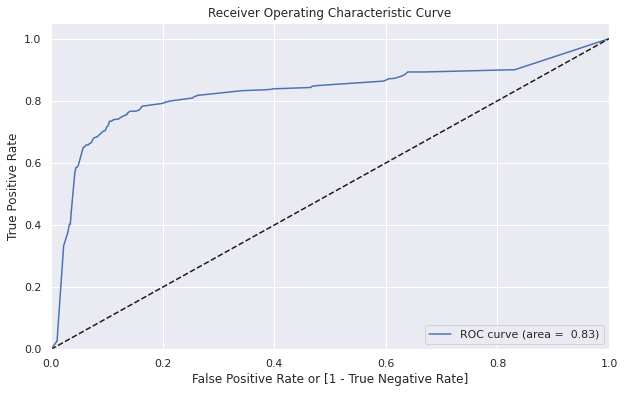

(array([0.        , 0.01059603, 0.01071644, 0.02251656, 0.02275738,
        0.03022276, 0.03239013, 0.03311258, 0.03443709, 0.03612282,
        0.04262492, 0.04455148, 0.04515352, 0.04635762, 0.04840458,
        0.05755569, 0.05851896, 0.05875978, 0.0590006 , 0.05996388,
        0.0628537 , 0.06309452, 0.06598435, 0.06754967, 0.0679109 ,
        0.06815172, 0.06875376, 0.06887417, 0.07224564, 0.07381096,
        0.07633955, 0.07995184, 0.08031306, 0.08175798, 0.09343769,
        0.09440096, 0.09452137, 0.09560506, 0.09608669, 0.09668874,
        0.09813365, 0.09825406, 0.09849488, 0.10018061, 0.1025888 ,
        0.10319085, 0.10331126, 0.10403371, 0.10463576, 0.10523781,
        0.10547863, 0.10583986, 0.10668272, 0.10692354, 0.10788682,
        0.11161951, 0.11186033, 0.11222155, 0.11318483, 0.1141481 ,
        0.11643588, 0.12137267, 0.12197471, 0.12269717, 0.12329922,
        0.12859723, 0.13232992, 0.13317279, 0.13377483, 0.13642384,
        0.13702589, 0.14184226, 0.15111379, 0.15

In [191]:
# plotting ROC curve for actual v/s pred comparision
plot_roc_curve(y_test.values, test_pred_prob)

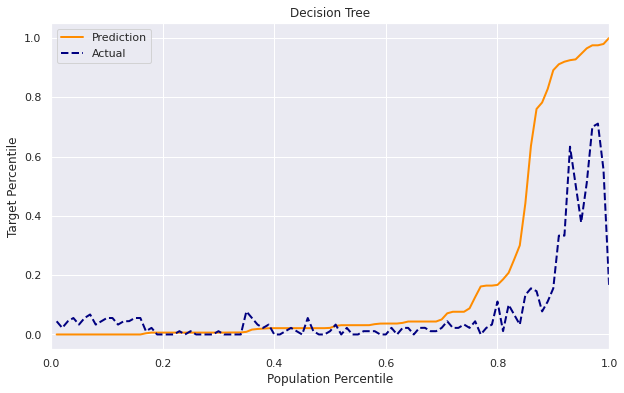

In [193]:
# plotting lift curve for actual v/s pred comparison
plot_lift_curves(y_test.values, test_pred_prob, "Decision Tree")

### 5) Random Forest 

In [281]:
# Creating Random Forest Model
rand_forest = RandomForestClassifier(n_estimators=100, random_state=100, oob_score=True)

In [282]:
# fitting the model
# fit_model(model=rand_forest, X_train=X_train_smt, y_train=y_train_smt)
rand_forest.fit(X_train_smt, y_train_smt)

RandomForestClassifier(oob_score=True, random_state=100)

In [283]:
rand_forest.oob_score_

0.966120218579235

In [284]:
# precition on test data
test_pred_prob = rand_forest.predict(X_test_scaled)
get_model_metrics(actual_churn=y_test, pred_churn=test_pred_prob)

ROC AUC score: 0.81
Accuracy score: 0.93
Sensitivity/Recall score: 0.67
Specificity score: 0.96
Positive Predictive value/Precision score: 0.56
Negative Predictive value: 0.97
F score: 0.61


{'model_name': '',
 'roc_auc_score': 0.81,
 'accuracy': 0.93,
 'recall': 0.67,
 'specificity': 0.96,
 'precision': 0.56,
 'negative_score': 0.97,
 'f_score': 0.61}

In [114]:
# predicting probality on the train data
train_pred_prob = rand_forest.predict_proba(X_train_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

1.0


In [115]:
# predicting probality on the test data
test_pred_prob = rand_forest.predict_proba(X_test_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.93


#### Random Forest with Hyperparameter Tuning

In [121]:
# RandomizedSearchCV - HPT 


n_estimators = [50, 100, 150, 200]
max_features = ['auto', 'sqrt']
max_depth = [2,3,5,10,20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(estimator=rand_forest, param_distributions=random_grid, n_iter=100, cv=3, n_jobs=8,
                               verbose=10, random_state=42, scoring="recall")

In [122]:
# fitting the model
# fit_model(model=rf_random_search, X_train=X_train_smt, y_train=y_train_smt)
rf_random_search.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:   36.1s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:  5.7min
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:  8.6min
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed: 10.2min
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed: 13.7min
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed: 15.0min
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed: 17.3min
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed: 19.5min
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed: 22.7min
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed: 27.4min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 29.7min
[Parallel(

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=8,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='recall', verbose=10)

In [123]:
# random forest best estimator 
rf_random_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=200,
                       random_state=42)

In [124]:
# storing the best estimator
rf_random_search_best = rf_random_search.best_estimator_

In [279]:
# precition on test data
test_pred_prob = rf_random_search_best.predict(X_test_scaled)
rf_metrics_dict = get_model_metrics(actual_churn=y_test, pred_churn=test_pred_prob, model_name="Random Forest")

ROC AUC score: 0.81
Accuracy score: 0.94
Sensitivity/Recall score: 0.67
Specificity score: 0.96
Positive Predictive value/Precision score: 0.57
Negative Predictive value: 0.97
F score: 0.62


In [126]:
# predicting probality on the train data
train_pred_prob = rf_random_search_best.predict_proba(X_train_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

1.0


In [127]:
# predicting probality on the test data
test_pred_prob = rf_random_search_best.predict_proba(X_test_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.93


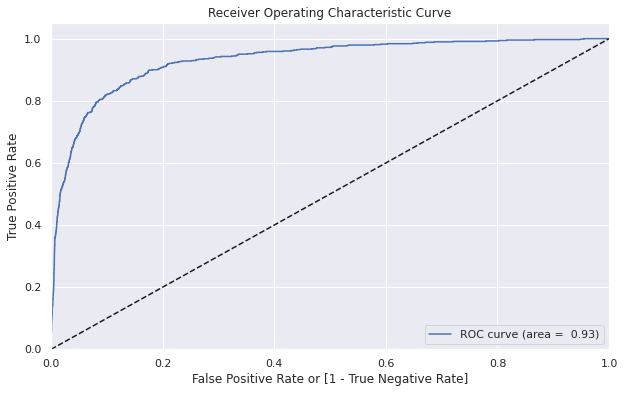

(array([0.        , 0.        , 0.        , ..., 0.99975918, 0.99987959,
        1.        ]),
 array([0.        , 0.00146843, 0.00293686, ..., 1.        , 1.        ,
        1.        ]),
 array([1.98545379e+00, 9.85453794e-01, 9.84888341e-01, ...,
        4.60829493e-06, 4.03877221e-06, 0.00000000e+00]))

In [130]:
# plotting ROC curve for actual v/s pred comparision
plot_roc_curve(y_test.values, test_pred_prob)

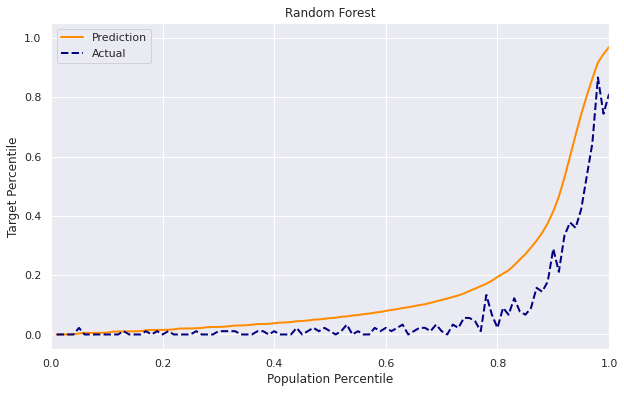

In [129]:
# plotting lift curve for actual v/s pred comparison
plot_lift_curves(y_test.values, test_pred_prob, "Random Forest")

### Gradient Boosting 

In [194]:
# Creating GBM Model
gbm_clf = GradientBoostingClassifier(random_state=100) # default 
gbm_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [195]:
# fitting the model
fit_model(model=gbm_clf, X_train=X_train_smt, y_train=y_train_smt)

CV Score: Mean - 0.98 | Std - 0.01             | Min - 0.96 | Max - 0.99
ROC AUC score: 0.94
Accuracy score: 0.94
Sensitivity/Recall score: 0.94
Specificity score: 0.93
Positive Predictive value/Precision score: 0.93
Negative Predictive value: 0.94
F score: 0.94
AUC Score (Train): 0.98


In [270]:
# Get our predictions
gbm_predictions = gbm_clf.predict(X_test_scaled)
get_model_metrics(actual_churn=y_test, pred_churn=gbm_predictions)

ROC AUC score: 0.83
Accuracy score: 0.92
Sensitivity/Recall score: 0.73
Specificity score: 0.93
Positive Predictive value/Precision score: 0.46
Negative Predictive value: 0.98
F score: 0.56


In [197]:
# predicting probability on test data
gbm_predictions_prob = gbm_clf.predict_proba(X_test_scaled)
gbm_predictions_prob

array([[0.89842651, 0.10157349],
       [0.97086962, 0.02913038],
       [0.75010135, 0.24989865],
       ...,
       [0.9532947 , 0.0467053 ],
       [0.90757442, 0.09242558],
       [0.75958141, 0.24041859]])

In [198]:
# predicting probality on the train data
train_pred_prob = gbm_clf.predict_proba(X_train_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

0.98


In [199]:
# predicting probality on the test data
test_pred_prob = gbm_clf.predict_proba(X_test_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.92


In [200]:
# Gradient Boosting Parameters
gbm_params ={
    'n_estimators': 500,   # no of Trees 
    'learning_rate' : 0.2,
    'max_depth': 11,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 100,
    'verbose': 0
}

gbm_clf_ht = GradientBoostingClassifier(**gbm_params) # After Doing HPT , we can pass the paramaters

In [201]:
# fitting the model
fit_model(model=gbm_clf_ht, X_train=X_train_smt, y_train=y_train_smt)

CV Score: Mean - 1.0 | Std - 0.0             | Min - 0.99 | Max - 1.0
ROC AUC score: 1.0
Accuracy score: 1.0
Sensitivity/Recall score: 1.0
Specificity score: 1.0
Positive Predictive value/Precision score: 1.0
Negative Predictive value: 1.0
F score: 1.0
AUC Score (Train): 1.0


In [287]:
# precition on test data
test_pred_prob = gbm_clf_ht.predict(X_test)
gbm_metrics_dict = get_model_metrics(actual_churn=y_test, pred_churn=test_pred_prob, model_name="Gradient Boosting")

ROC AUC score: 0.73
Accuracy score: 0.93
Sensitivity/Recall score: 0.49
Specificity score: 0.97
Positive Predictive value/Precision score: 0.56
Negative Predictive value: 0.96
F score: 0.52


In [202]:
# precition on test data
gbm_predictions_prob = gbm_clf_ht.predict_proba(X_test_scaled)
gbm_predictions_prob

array([[1.00000000e+00, 1.01829801e-12],
       [1.00000000e+00, 1.11292278e-14],
       [9.99999908e-01, 9.15570201e-08],
       ...,
       [1.00000000e+00, 5.66486136e-14],
       [9.99999815e-01, 1.85498801e-07],
       [1.00000000e+00, 1.03171796e-11]])

In [203]:
# predicting probality on the train data
train_pred_prob = gbm_clf_ht.predict_proba(X_train_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

1.0


In [204]:
# predicting probality on the test data
test_pred_prob = gbm_clf_ht.predict_proba(X_test_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.93


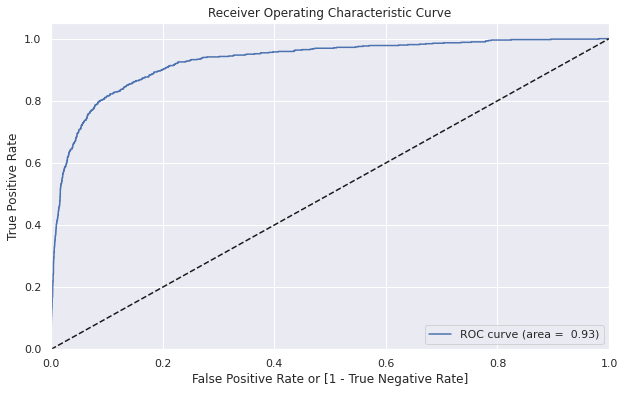

(array([0.        , 0.        , 0.        , ..., 0.99975918, 0.99987959,
        1.        ]),
 array([0.        , 0.00146843, 0.00293686, ..., 1.        , 1.        ,
        1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        8.22800963e-19, 2.48490362e-19, 1.76160441e-19]))

In [205]:
# plotting ROC curve for actual v/s pred comparision
plot_roc_curve(y_test.values, test_pred_prob)

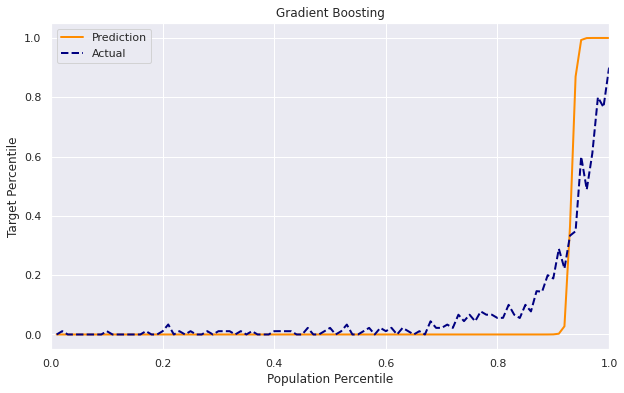

In [207]:
# plotting lift curve for actual v/s pred comparison
plot_lift_curves(y_test.values, test_pred_prob, "Gradient Boosting")

### XGBoost 

In [210]:
# Creating Xgboost Model
xgb_cfl = xgb.XGBClassifier(objective = 'binary:logistic',random_state = 42, n_jobs=-1, tree_method="gpu_hist" )
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'gpu_hist',
 'validate_parameters': None,
 'verbosity': None}

In [211]:
# fitting the model
fit_model(model=xgb_cfl, X_train=X_train_smt, y_train=y_train_smt)

CV Score: Mean - 0.99 | Std - 0.01             | Min - 0.97 | Max - 1.0
ROC AUC score: 1.0
Accuracy score: 1.0
Sensitivity/Recall score: 1.0
Specificity score: 1.0
Positive Predictive value/Precision score: 1.0
Negative Predictive value: 1.0
F score: 1.0
AUC Score (Train): 1.0


In [271]:
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test_scaled)
xgb_metrics_dict = get_model_metrics(actual_churn=y_test, pred_churn=xgb_predictions)

ROC AUC score: 0.78
Accuracy score: 0.94
Sensitivity/Recall score: 0.59
Specificity score: 0.97
Positive Predictive value/Precision score: 0.63
Negative Predictive value: 0.97
F score: 0.61


In [213]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test_scaled)
xgb_predictions_prob

array([[9.9868518e-01, 1.3148235e-03],
       [9.9968803e-01, 3.1196710e-04],
       [9.9437439e-01, 5.6256084e-03],
       ...,
       [9.9841630e-01, 1.5836699e-03],
       [9.6808302e-01, 3.1916980e-02],
       [9.6617317e-01, 3.3826806e-02]], dtype=float32)

In [214]:
# predicting probality on the train data
train_pred_prob = xgb_cfl.predict_proba(X_train_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

1.0


In [215]:
# predicting probality on the test data
test_pred_prob = xgb_cfl.predict_proba(X_test_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.92


In [218]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [50, 100, 150, 200], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 3

param_comb = 100

xgb_random_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, n_iter=param_comb, scoring='recall', n_jobs=-1, cv=3, verbose=3, random_state=42)


In [219]:
# fitting the model
# fit_model(model=xgb_random_search, X_train=X_train_smt, y_train=y_train_smt)
xgb_random_search.fit(X_train_smt, y_train_smt)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.0min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=0, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...
                                           tree_method='gpu_hist',
                                           validate_parameters=1,
                                           verbosity=None),
                   n_iter=100, n

In [288]:
# Get our predictions
xgb_predictions = xgb_random_search.predict(X_test_scaled)
xgb_metrics_dict = get_model_metrics(actual_churn=y_test, pred_churn=xgb_predictions, model_name="Extreme Gradient Boosting")

ROC AUC score: 0.81
Accuracy score: 0.93
Sensitivity/Recall score: 0.66
Specificity score: 0.96
Positive Predictive value/Precision score: 0.55
Negative Predictive value: 0.97
F score: 0.6


In [220]:
xgb_predictions_prob = xgb_random_search.predict_proba(X_test_scaled)
xgb_predictions_prob

array([[0.92830926, 0.07169076],
       [0.992562  , 0.00743802],
       [0.9074015 , 0.09259851],
       ...,
       [0.9883956 , 0.01160445],
       [0.9307375 , 0.06926248],
       [0.981649  , 0.01835104]], dtype=float32)

In [221]:
# predicting probality on the train data
train_pred_prob = xgb_random_search.predict_proba(X_train_smt)[:,1]
print(round(metrics.roc_auc_score(y_train_smt, train_pred_prob), 2))

1.0


In [222]:
# predicting probality on the test data
test_pred_prob = xgb_random_search.predict_proba(X_test_scaled)[:,1]
print(round(metrics.roc_auc_score(y_test, test_pred_prob), 2))

0.93


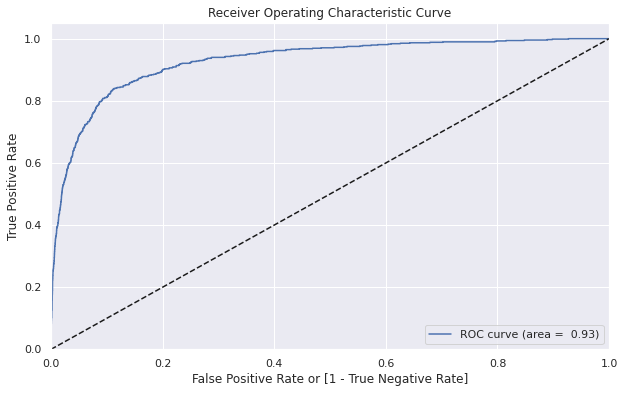

(array([0.        , 0.        , 0.        , ..., 0.99975918, 0.99987959,
        1.        ]),
 array([0.        , 0.00146843, 0.00293686, ..., 1.        , 1.        ,
        1.        ]),
 array([1.9853806 , 0.9853806 , 0.98493814, ..., 0.00461257, 0.00447458,
        0.00440598], dtype=float32))

In [223]:
# plotting ROC curve for actual v/s pred comparision
plot_roc_curve(y_test.values, test_pred_prob)

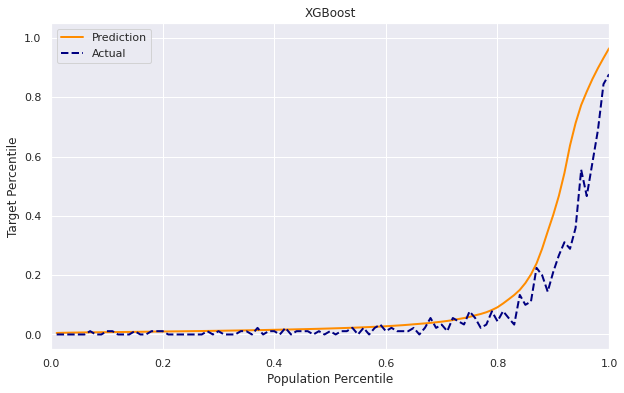

In [225]:
# plotting lift curve for actual v/s pred comparison
plot_lift_curves(y_test.values, test_pred_prob, "XGBoost")

## Model Comparision

In [325]:
final_metrics_list = [lr_base_metrics_dict, lr_pca_metrics_dict, lr_pca_penalty_metrics_dict, dt_metrics_dict,
                     rf_metrics_dict, gbm_metrics_dict, xgb_metrics_dict]

metrics_df = pd.DataFrame(final_metrics_list)
metrics_df.columns = ["Model Name", "ROC AUC Score", "Accuracy", "Recall", "Specificity", "Precision", "Negative Predictive Score", 
                     "F1 Score"]
metrics_df

,Model Name,ROC AUC Score,Accuracy,Recall,Specificity,Precision,Negative Predictive Score,F1 Score
0,Logistic Regression Basic,0.83,0.82,0.84,0.82,0.27,0.98,0.41
1,Logistic Regression with PCA,0.83,0.82,0.84,0.82,0.27,0.98,0.41
2,Logistic Regression with PCA and L2 Penalty,0.83,0.82,0.84,0.82,0.27,0.98,0.41
3,Decision Tree,0.81,0.88,0.73,0.90,0.37,0.98,0.49
4,Random Forest,0.81,0.94,0.67,0.96,0.57,0.97,0.62
5,Gradient Boosting,0.73,0.93,0.49,0.97,0.56,0.96,0.52
6,Extreme Gradient Boosting,0.81,0.93,0.66,0.96,0.55,0.97,0.60


Based on the business KPIs defined for recall, we can observe that the logistic regression model with PCA is the best model and performed well and fast with a recall value of 0.84.<br>
Secondly, Decision tree performs well after logistic regression in terms of accuracy and recall.<br>
Finally, based on hyper-parameter tuning, XGBoost and Random forest gives the best accuracy of all.

## Important Features

### 1) XGBoost Method

In [226]:
xgb_cfl.feature_importances_

array([0.00239734, 0.00437261, 0.00219169, 0.00155105, 0.00117817,
       0.00224081, 0.0015469 , 0.0016815 , 0.00250624, 0.00405127,
       0.00300544, 0.01452929, 0.00364701, 0.00467615, 0.05004586,
       0.00303616, 0.00158414, 0.00129097, 0.00148631, 0.00208855,
       0.00216134, 0.00231515, 0.00589849, 0.00285922, 0.0025171 ,
       0.00410512, 0.00192059, 0.00122693, 0.00168054, 0.00383286,
       0.0018683 , 0.00838958, 0.00262038, 0.0014949 , 0.0023968 ,
       0.00141029, 0.00407361, 0.00299625, 0.00212509, 0.00312288,
       0.00338187, 0.00098976, 0.0034503 , 0.00696429, 0.00569775,
       0.00229104, 0.00856684, 0.0023431 , 0.00579759, 0.00630149,
       0.00168847, 0.00228302, 0.00145645, 0.01334797, 0.00158281,
       0.00174571, 0.00152636, 0.00274869, 0.00169976, 0.00242535,
       0.00413997, 0.00227505, 0.001756  , 0.00338433, 0.00226612,
       0.1511743 , 0.0020865 , 0.00522717, 0.00175077, 0.00179373,
       0.00130128, 0.00110272, 0.00423103, 0.0010295 , 0.00381

In [254]:
# mapping the variable name with the importance
xgb_imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": xgb_cfl.feature_importances_
    })

In [255]:
# sorting the importand features in descending order
xgb_imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
65,loc_ic_mou_8,0.15
140,fb_user_8,0.11
80,total_ic_mou_8,0.11
14,roam_og_mou_8,0.05
83,spl_ic_mou_8,0.02
95,total_rech_amt_8,0.02
139,fb_user_7,0.02
92,total_rech_num_8,0.02
101,last_day_rch_amt_8,0.02
11,roam_ic_mou_8,0.01


In [227]:
# Scatter plot 
trace = go.Scatter(
    y = xgb_cfl.feature_importances_,
    x = telecom_data.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1.3,
        size = 12,
        color = xgb_cfl.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = telecom_data.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'XGBOOST Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

### 2) Random Forest

In [233]:
# getting the importance score
rf_random_search_best.feature_importances_

array([3.42432879e-03, 4.29169507e-03, 3.59636839e-02, 3.23318632e-03,
       3.35897141e-03, 5.94432678e-03, 3.15196826e-03, 3.57111015e-03,
       9.65361368e-03, 2.49958467e-03, 4.98411695e-03, 4.43184862e-02,
       2.58178336e-03, 5.74684573e-03, 4.08952884e-02, 2.95003840e-03,
       3.32963495e-03, 1.36647849e-02, 3.31951714e-03, 3.74955593e-03,
       3.00096696e-02, 2.03268420e-03, 2.69035621e-03, 3.89058473e-03,
       1.85279704e-03, 2.84969283e-03, 1.76925559e-03, 3.25847769e-03,
       3.72714306e-03, 2.77097131e-02, 3.69814250e-03, 4.41147696e-03,
       3.54172283e-03, 2.99936314e-03, 3.92390168e-03, 4.90562078e-03,
       8.86719977e-04, 1.15723361e-03, 9.80445976e-04, 3.08425917e-03,
       4.54326359e-03, 5.22185741e-03, 1.36464625e-03, 2.63441585e-03,
       1.85531676e-03, 3.40273973e-03, 7.09402410e-03, 3.69694470e-03,
       2.73665717e-03, 1.61766313e-04, 2.00366138e-04, 3.18109175e-03,
       3.80513414e-03, 1.78911115e-02, 3.06381045e-03, 3.65277716e-03,
      

In [248]:
# mapping the variable name with the importance
rf_imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_random_search_best.feature_importances_
})

In [249]:
# sorting the importand features in descending order
rf_imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
65,loc_ic_mou_8,0.06
80,total_ic_mou_8,0.05
11,roam_ic_mou_8,0.04
59,loc_ic_t2m_mou_8,0.04
95,total_rech_amt_8,0.04
14,roam_og_mou_8,0.04
101,last_day_rch_amt_8,0.04
2,arpu_8,0.04
140,fb_user_8,0.03
20,loc_og_t2m_mou_8,0.03


In [292]:
# Scatter plot 
trace = go.Scatter(
    y = rf_random_search_best.feature_importances_,
    x = telecom_data.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1.3,
        size = 12,
        color = rf_random_search_best.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = telecom_data.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

In [331]:
combined_imp_df = pd.merge(xgb_imp_df, rf_imp_df, on="Varname", how="inner")
combined_imp_df.columns = ["Feature Name", "XGBoost Importance Score", "RF Importance Score"]

combined_imp_df.sort_values(["XGBoost Importance Score", "RF Importance Score"], ascending=False, inplace=True)
combined_imp_df

,Feature Name,XGBoost Importance Score,RF Importance Score
65,loc_ic_mou_8,0.15,0.06
140,fb_user_8,0.11,0.03
80,total_ic_mou_8,0.11,0.05
14,roam_og_mou_8,0.05,0.04
83,spl_ic_mou_8,0.02,0.00
95,total_rech_amt_8,0.02,0.04
139,fb_user_7,0.02,0.00
92,total_rech_num_8,0.02,0.02
101,last_day_rch_amt_8,0.02,0.04
11,roam_ic_mou_8,0.01,0.04


In [330]:
print(combined_imp_df["Feature Name"].to_list()[:15])

['loc_ic_mou_8', 'fb_user_8', 'total_ic_mou_8', 'roam_og_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8', 'fb_user_7', 'total_rech_num_8', 'last_day_rch_amt_8', 'roam_ic_mou_8', 'total_og_mou_8', 'monthly_2g_6', 'count_rech_2g_8', 'max_rech_data_8', 'monthly_2g_7']


We can observe that both XGBoost and Random Forest had identified similar set of features as most important driving factors in determining customer churn.
The top 15 features are based on above observation are:
1. loc_ic_mou_8
2. fb_user_8
3. total_ic_mou_8
4. roam_og_mou_8 
5. spl_ic_mou_8 
6. total_rech_amt_8 
7. fb_user_7 
8. total_rech_num_8
9. last_day_rch_amt_8 
10. roam_ic_mou_8 
11. total_og_mou_8 
12. monthly_2g_6 
13. count_rech_2g_8 
14. max_rech_data_8 
15. monthly_2g_7